In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Combined Dataset/alzheimers_disease_data.csv')
data

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,6895,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,...,0,0,4.492838,1,0,0,0,0,1,XXXConfid
2145,6896,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,...,0,1,9.204952,0,0,0,0,0,1,XXXConfid
2146,6897,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,...,0,0,5.036334,0,0,0,0,0,1,XXXConfid
2147,6898,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,...,0,0,3.785399,0,0,0,0,1,1,XXXConfid


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [4]:
# check for duplicate values
data.duplicated().value_counts()

False    2149
Name: count, dtype: int64

In [3]:
# drop unimportaint colums
data.drop(['DoctorInCharge', 'PatientID'], axis=1, inplace=True)

In [6]:
# Split data into different categories
demographic = ['Age', 'Gender', 'Ethnicity', 'EducationLevel']
lifestyle = ['BMI', 'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality']
medical_history = ['FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes', 'Depression', 'HeadInjury', 'Hypertension']
clinical = ['SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides']
cognitive_functional = ['MMSE', 'FunctionalAssessment', 'MemoryComplaints', 'BehavioralProblems', 'ADL']
symptoms = ['Confusion', 'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness']

numerical_columns = ['Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment', 'ADL']
categorical_columns = ['Smoking','FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'MemoryComplaints', 'BehavioralProblems', 'Confusion', 'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness']
basic_info = ['Gender', 'Ethnicity', 'EducationLevel']

In [7]:
df = data.copy()

# Turn numeric code to categorical values
df['Gender'] = df['Gender'].replace({0: 'Male', 1: 'Female'})
df['Ethnicity'] = df['Ethnicity'].replace({0: 'Caucasian', 1: 'African American', 2: 'Asian', 3: 'Other'})  # Caucasian: Người da trắng (gốc Châu Âu), African American: Người da đen (gốc Phi)
df['EducationLevel'] = df['EducationLevel'].replace({0: 'None', 1: 'High School', 2: "Bachelor's", 3: 'Higher'})
df[categorical_columns] = df[categorical_columns].replace({0: 'No', 1: 'Yes'})

categorical_columns = basic_info + categorical_columns

# EDA

### Statistics of Numerical Features

In [8]:
df[numerical_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2149.0,74.908795,8.990221,60.000000,67.000000,75.000000,83.000000,90.000000
BMI,2149.0,27.655697,7.217438,15.008851,21.611408,27.823924,33.869778,39.992767
AlcoholConsumption,2149.0,10.039442,5.757910,0.002003,5.139810,9.934412,15.157931,19.989293
PhysicalActivity,2149.0,4.920202,2.857191,0.003616,2.570626,4.766424,7.427899,9.987429
DietQuality,2149.0,4.993138,2.909055,0.009385,2.458455,5.076087,7.558625,9.998346
SleepQuality,2149.0,7.051081,1.763573,4.002629,5.482997,7.115646,8.562521,9.999840
SystolicBP,2149.0,134.264774,25.949352,90.000000,112.000000,134.000000,157.000000,179.000000
DiastolicBP,2149.0,89.847836,17.592496,60.000000,74.000000,91.000000,105.000000,119.000000
CholesterolTotal,2149.0,225.197519,42.542233,150.093316,190.252963,225.086430,262.031657,299.993352
CholesterolLDL,2149.0,124.335944,43.366584,50.230707,87.195798,123.342593,161.733733,199.965665


### Distribution of Numerical Features

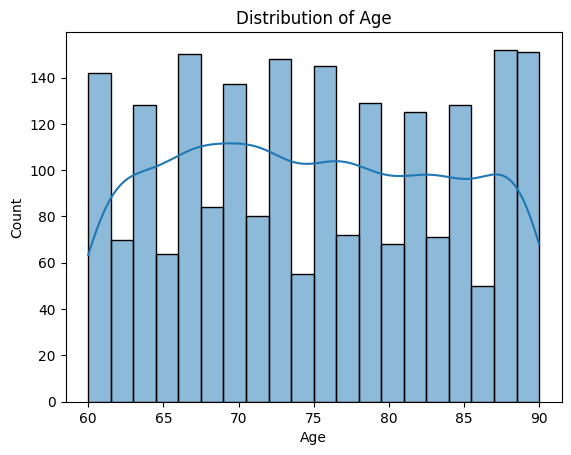

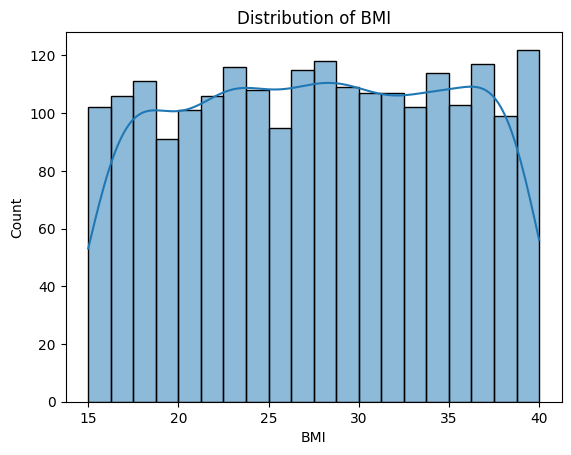

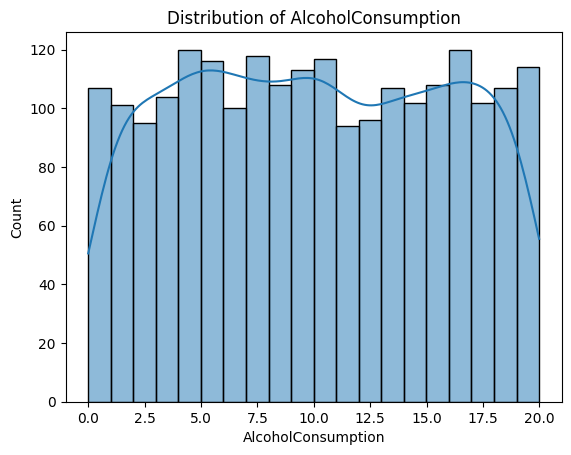

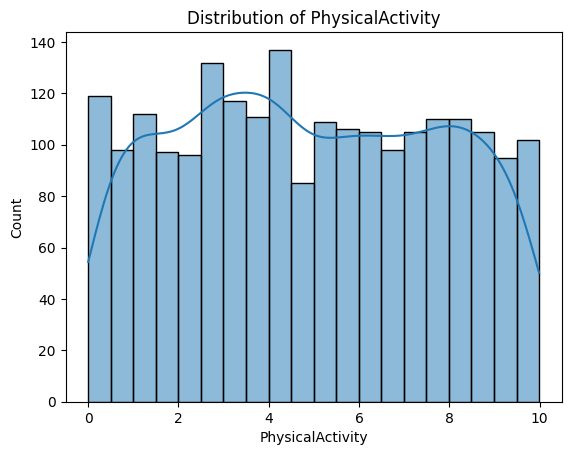

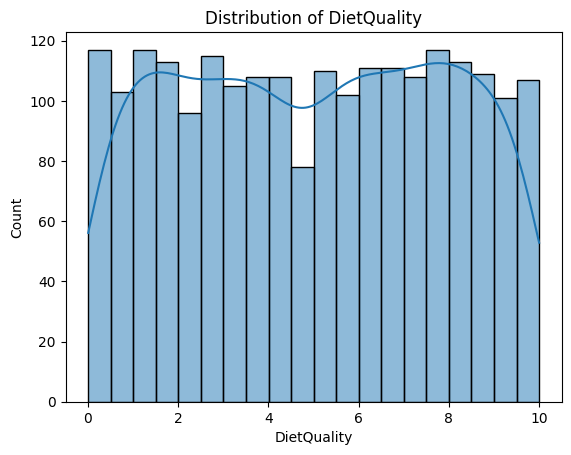

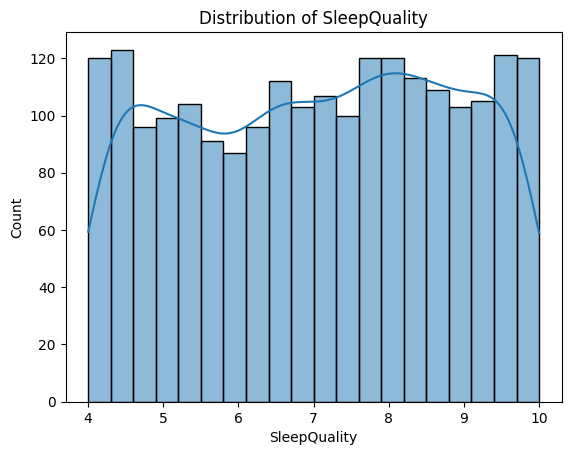

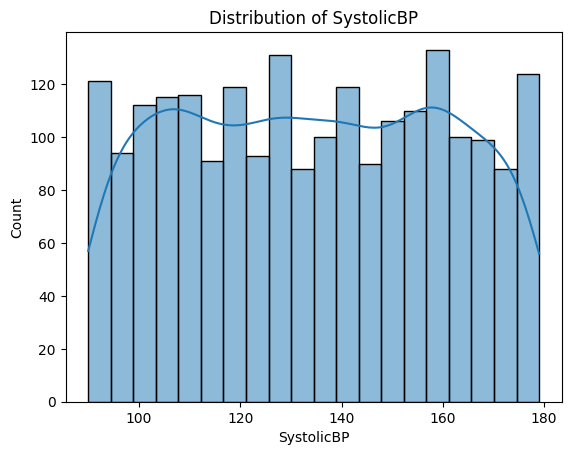

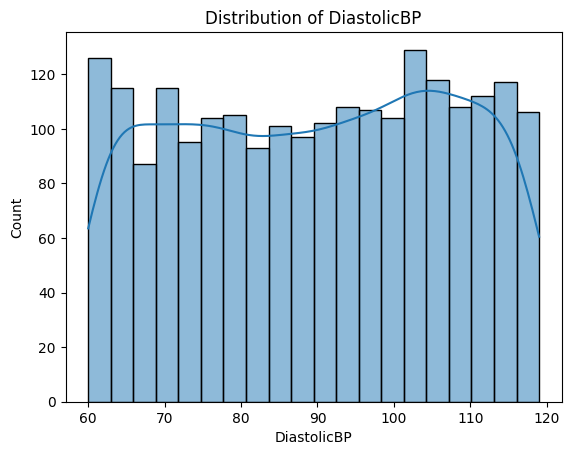

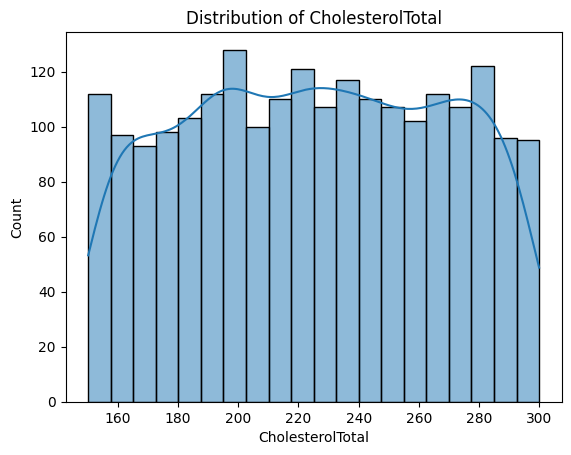

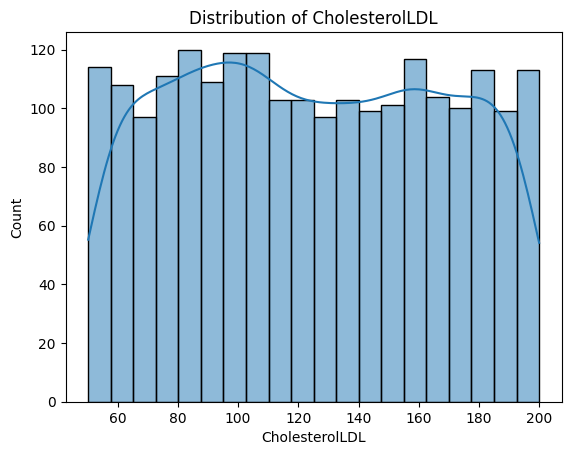

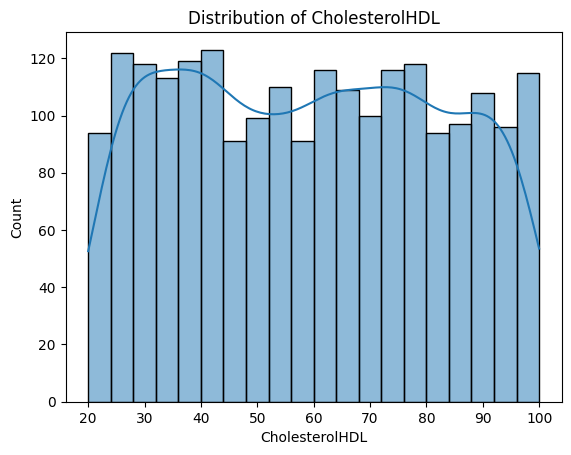

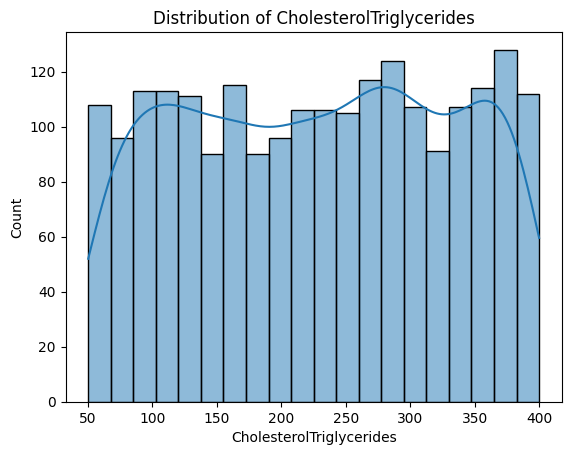

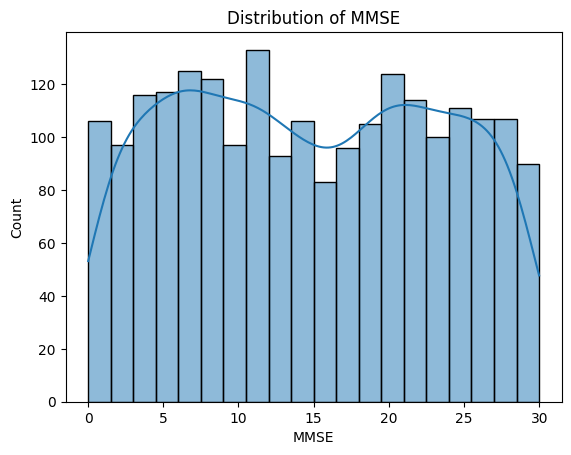

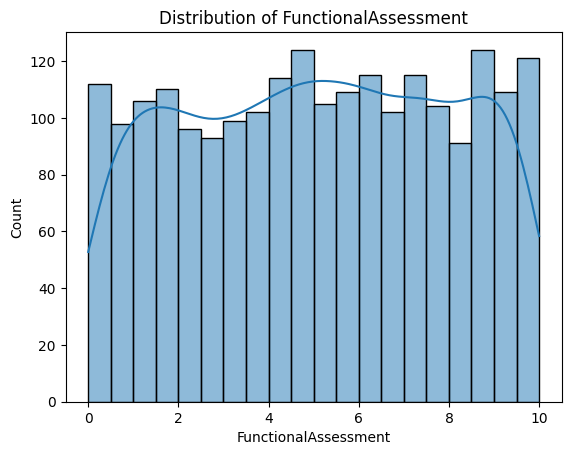

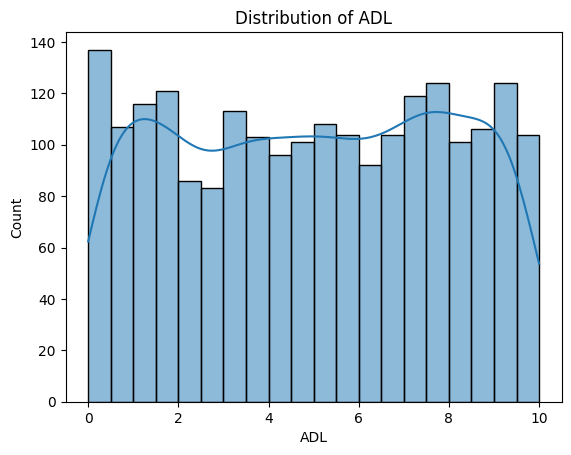

In [9]:
for col in numerical_columns:
    sns.histplot(data=df, x=col, kde=True, bins=20)
    plt.title(f"Distribution of {col}")
    plt.show()

### Distribution of Categorical Features

C:\Users\HanDong\AppData\Local\Temp\ipykernel_10556\4186291865.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='bright')


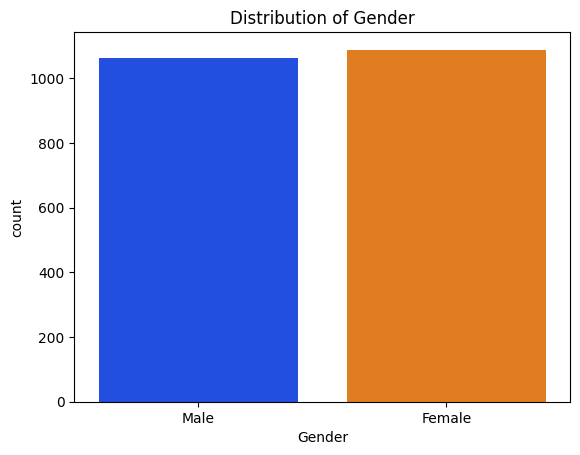

C:\Users\HanDong\AppData\Local\Temp\ipykernel_10556\4186291865.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='bright')


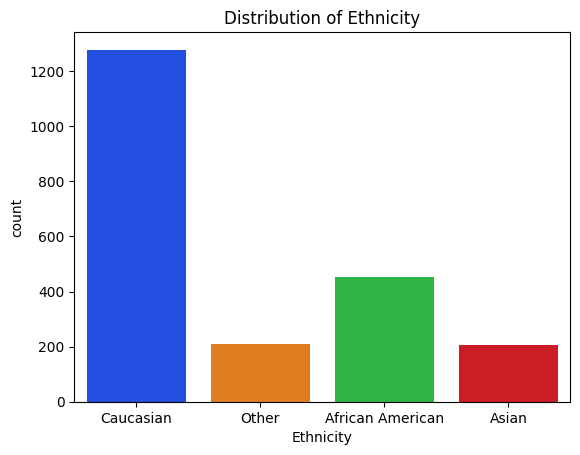

C:\Users\HanDong\AppData\Local\Temp\ipykernel_10556\4186291865.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='bright')


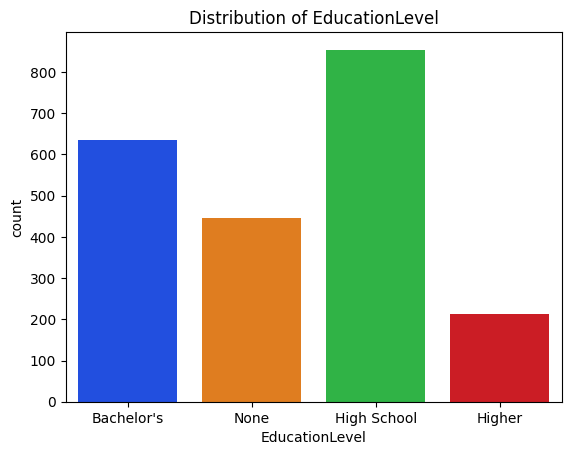

C:\Users\HanDong\AppData\Local\Temp\ipykernel_10556\4186291865.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='bright')


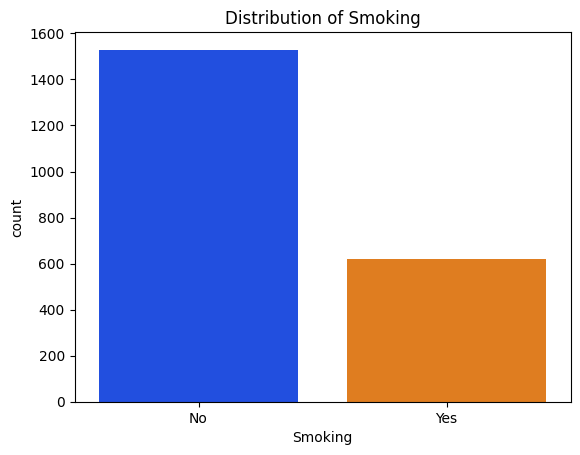

C:\Users\HanDong\AppData\Local\Temp\ipykernel_10556\4186291865.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='bright')


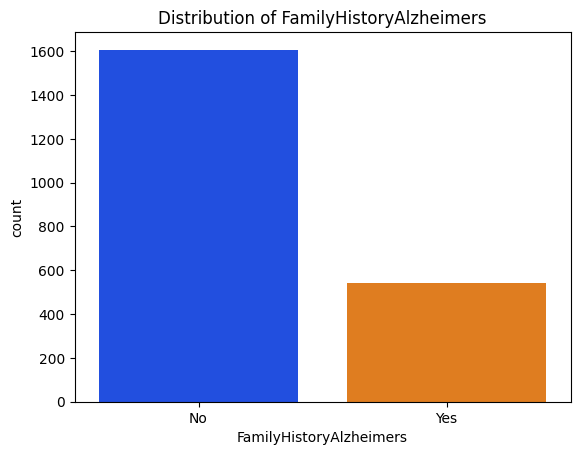

C:\Users\HanDong\AppData\Local\Temp\ipykernel_10556\4186291865.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='bright')


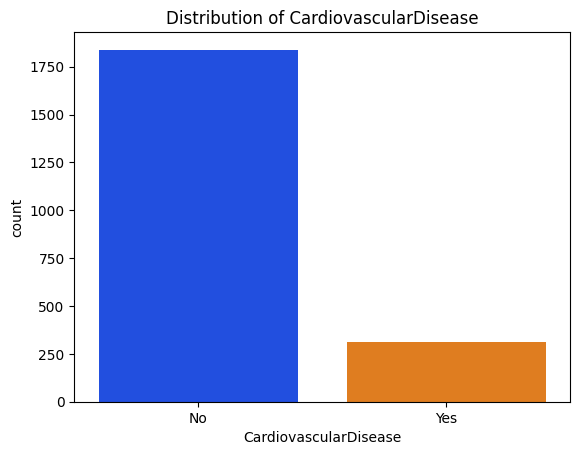

C:\Users\HanDong\AppData\Local\Temp\ipykernel_10556\4186291865.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='bright')


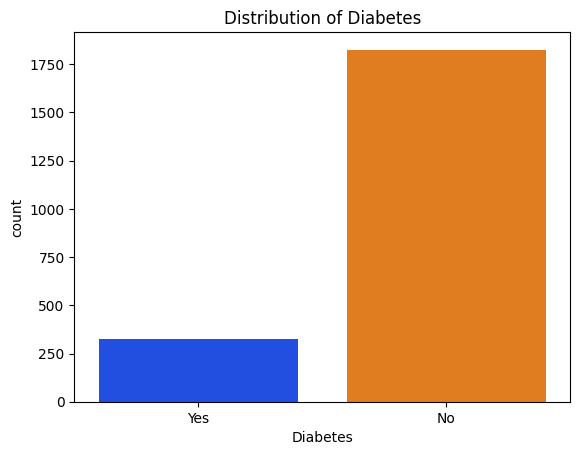

C:\Users\HanDong\AppData\Local\Temp\ipykernel_10556\4186291865.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='bright')


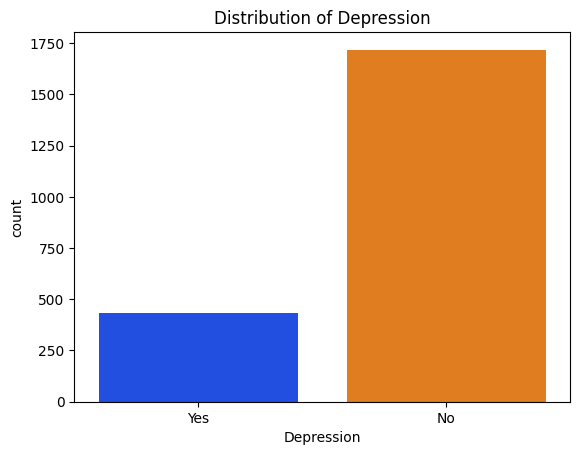

C:\Users\HanDong\AppData\Local\Temp\ipykernel_10556\4186291865.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='bright')


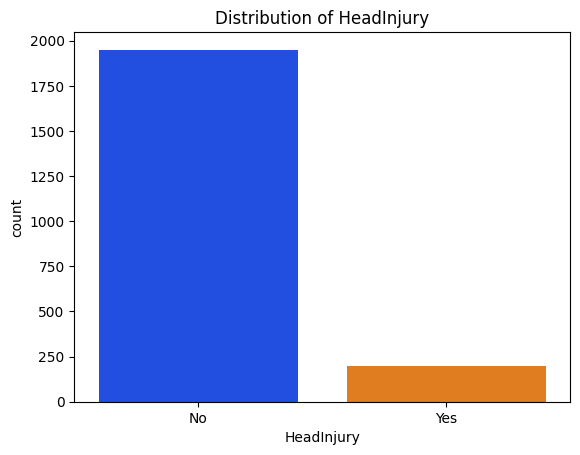

C:\Users\HanDong\AppData\Local\Temp\ipykernel_10556\4186291865.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='bright')


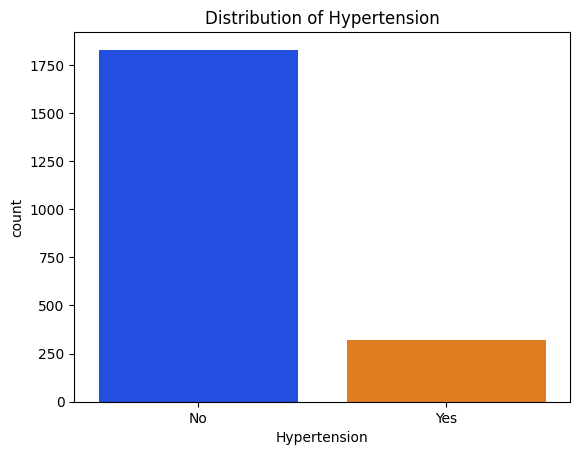

C:\Users\HanDong\AppData\Local\Temp\ipykernel_10556\4186291865.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='bright')


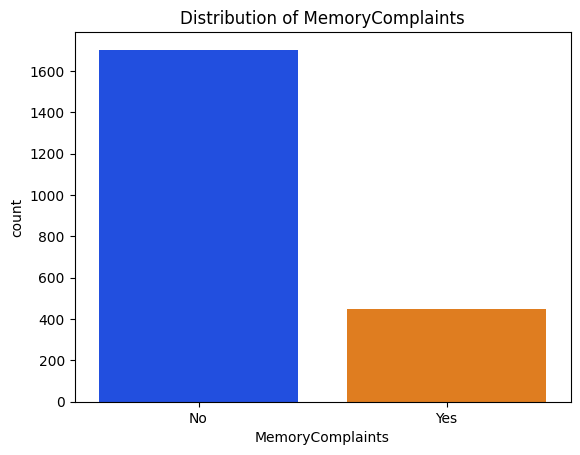

C:\Users\HanDong\AppData\Local\Temp\ipykernel_10556\4186291865.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='bright')


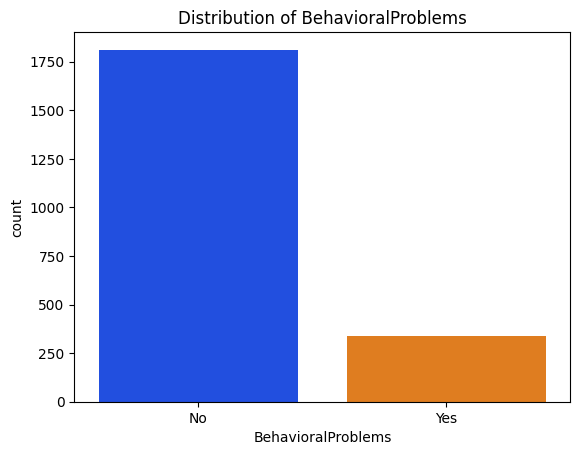

C:\Users\HanDong\AppData\Local\Temp\ipykernel_10556\4186291865.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='bright')


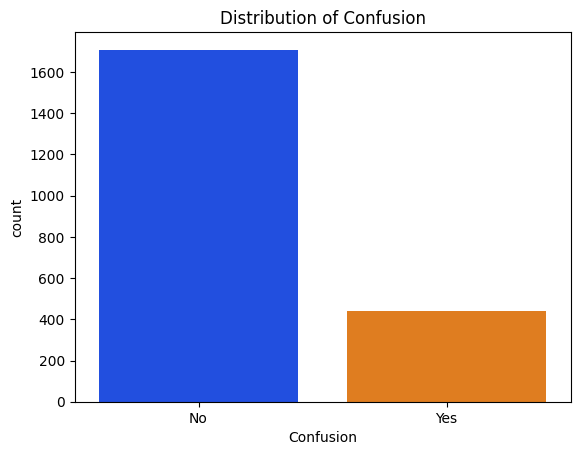

C:\Users\HanDong\AppData\Local\Temp\ipykernel_10556\4186291865.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='bright')


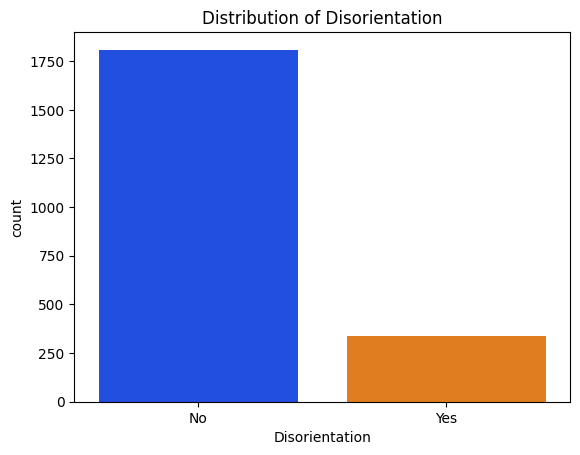

C:\Users\HanDong\AppData\Local\Temp\ipykernel_10556\4186291865.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='bright')


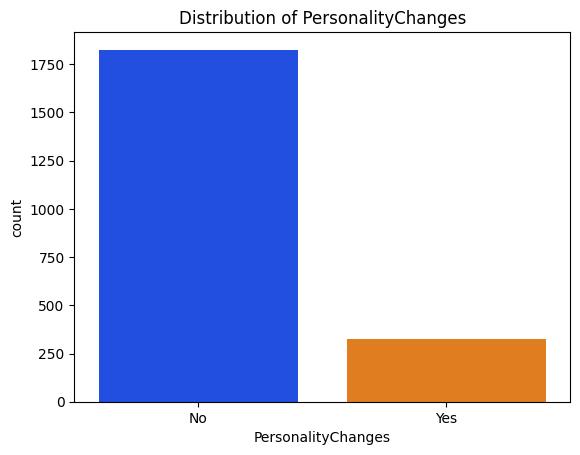

C:\Users\HanDong\AppData\Local\Temp\ipykernel_10556\4186291865.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='bright')


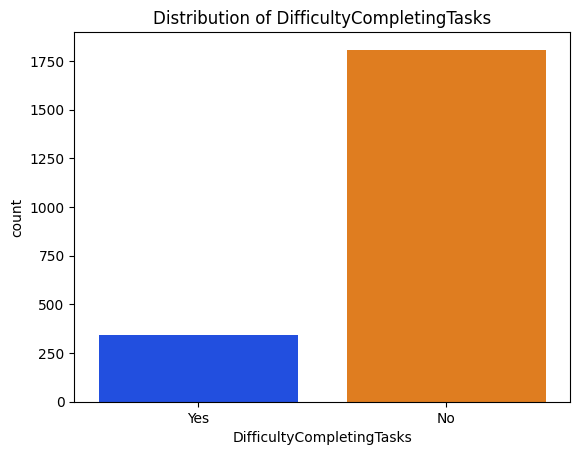

C:\Users\HanDong\AppData\Local\Temp\ipykernel_10556\4186291865.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='bright')


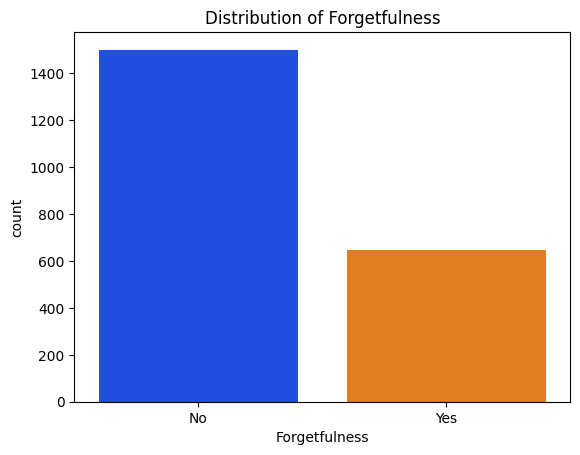

In [10]:
for col in categorical_columns:
    sns.countplot(data=df, x=col, palette='bright')
    plt.title(f"Distribution of {col}")
    plt.show()

### Analysis of Demographic Factors

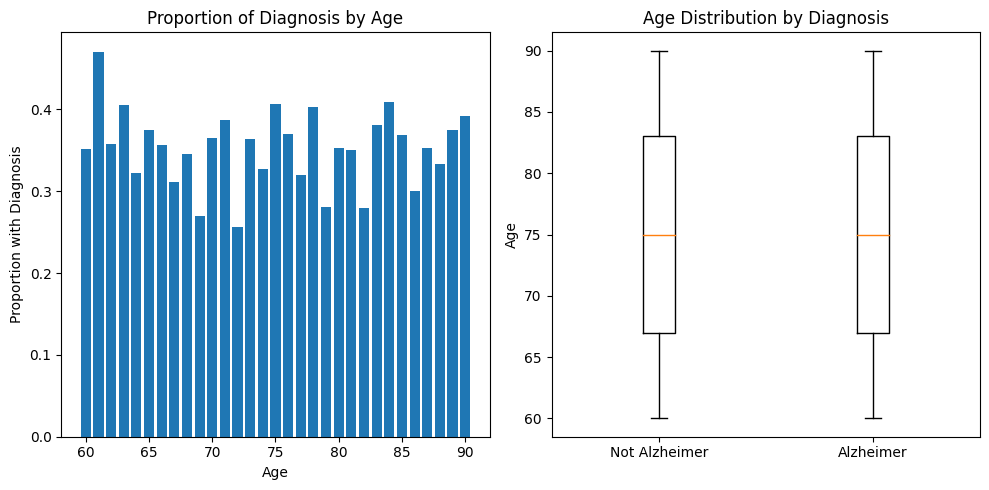

In [11]:
# Analysis of the impact of age
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
age_proportion = df.groupby('Age')['Diagnosis'].mean()
plt.bar(age_proportion.index, age_proportion.values)
plt.title('Proportion of Diagnosis by Age')
plt.xlabel('Age')
plt.ylabel('Proportion with Diagnosis')

plt.subplot(1,2,2)
plt.boxplot([data[data['Diagnosis'] == 0]['Age'], data[data['Diagnosis'] == 1]['Age']],labels=['Not Alzheimer', 'Alzheimer'])
plt.ylabel('Age')
plt.title('Age Distribution by Diagnosis')
plt.tight_layout()
plt.show()

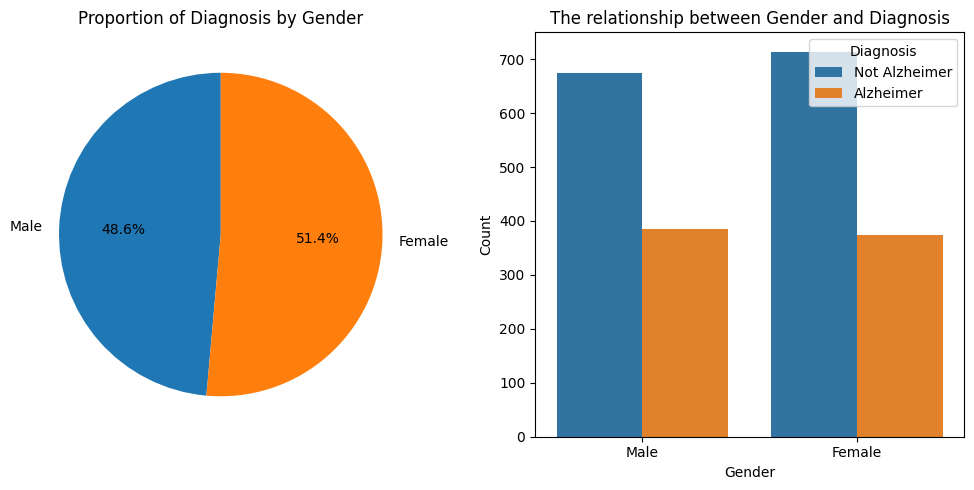

In [12]:
# Analysis of the impact of gender
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
gender_proportion = df.groupby('Gender')['Diagnosis'].mean()
plt.pie(gender_proportion, labels=['Male', 'Female'], autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Diagnosis by Gender')

plt.subplot(1,2,2)
sns.countplot(data=df, x='Gender', hue='Diagnosis')
plt.title('The relationship between Gender and Diagnosis')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Diagnosis', labels=['Not Alzheimer', 'Alzheimer'])

plt.tight_layout()
plt.show()

C:\Users\HanDong\AppData\Local\Temp\ipykernel_10556\304919302.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ethnicity_proportion.index, y=ethnicity_proportion.values, palette='Set2')


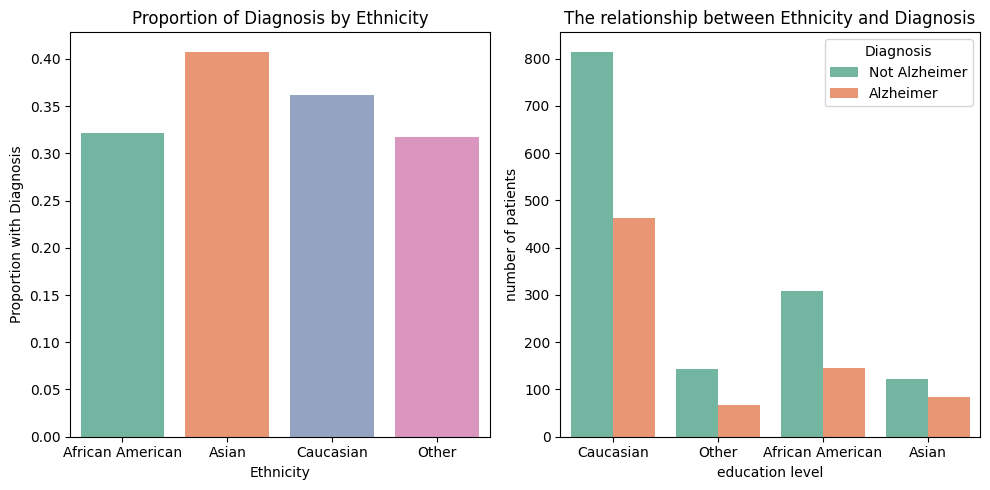

In [13]:
# Analysis of the impact of ethnicity
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
ethnicity_proportion = df.groupby('Ethnicity')['Diagnosis'].mean()
sns.barplot(x=ethnicity_proportion.index, y=ethnicity_proportion.values, palette='Set2')
plt.xlabel('Ethnicity')
plt.ylabel('Proportion with Diagnosis')
plt.title('Proportion of Diagnosis by Ethnicity')

plt.subplot(1,2,2)
sns.countplot(data=df, x='Ethnicity', hue='Diagnosis', palette='Set2')
plt.xlabel('education level')
plt.ylabel('number of patients')
plt.title('The relationship between Ethnicity and Diagnosis')
plt.legend(title='Diagnosis', labels=['Not Alzheimer', 'Alzheimer'])

plt.tight_layout()
plt.show()

C:\Users\HanDong\AppData\Local\Temp\ipykernel_10556\210110838.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=education_proportion.index, y=education_proportion.values, palette='Set2')


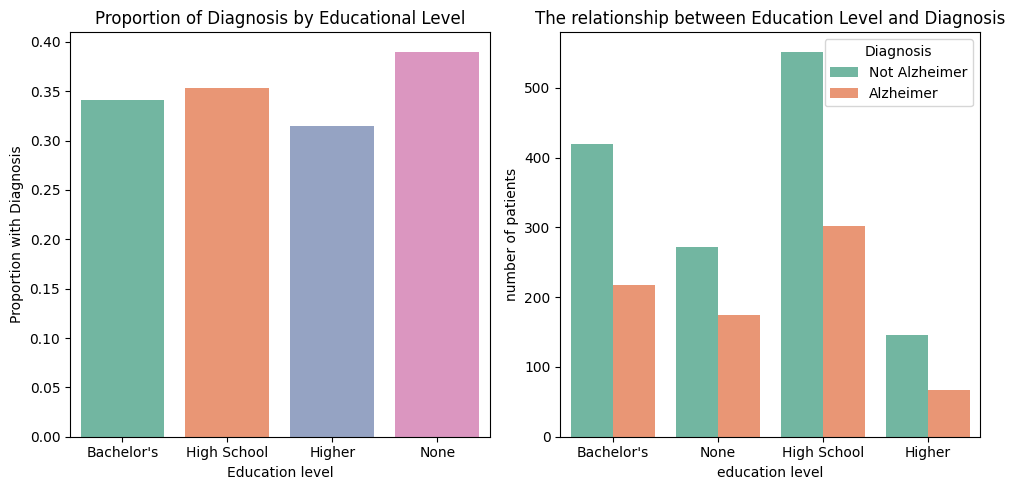

In [14]:
# Analysis of the impact of education level
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
education_proportion = df.groupby('EducationLevel')['Diagnosis'].mean()
sns.barplot(x=education_proportion.index, y=education_proportion.values, palette='Set2')
plt.xlabel('Education level')
plt.ylabel('Proportion with Diagnosis')
plt.title('Proportion of Diagnosis by Educational Level')

plt.subplot(1,2,2)
sns.countplot(data=df, x='EducationLevel', hue='Diagnosis', palette='Set2')
plt.xlabel('education level')
plt.ylabel('number of patients')
plt.title('The relationship between Education Level and Diagnosis')
plt.legend(title='Diagnosis', labels=['Not Alzheimer', 'Alzheimer'])

plt.tight_layout()
plt.show()

### Analysis of Lifestyle Factors

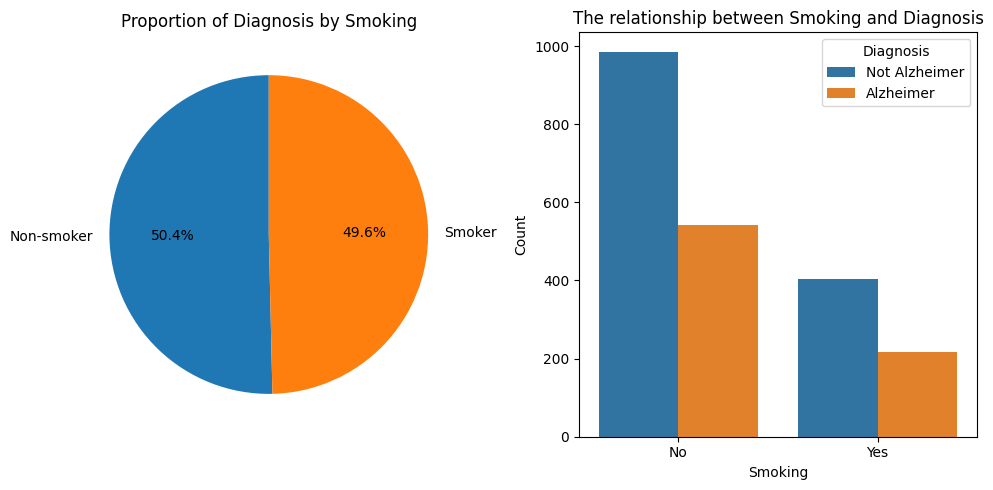

In [15]:
# Analysis of the impact of smoking
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
smoking_proportion = df.groupby('Smoking')['Diagnosis'].mean()
plt.pie(smoking_proportion, labels=['Non-smoker', 'Smoker'], autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Diagnosis by Smoking')

plt.subplot(1,2,2)
sns.countplot(data=df, x='Smoking', hue='Diagnosis')
plt.title('The relationship between Smoking and Diagnosis')
plt.xlabel('Smoking')
plt.ylabel('Count')
plt.legend(title='Diagnosis', labels=['Not Alzheimer', 'Alzheimer'])

plt.tight_layout()
plt.show()

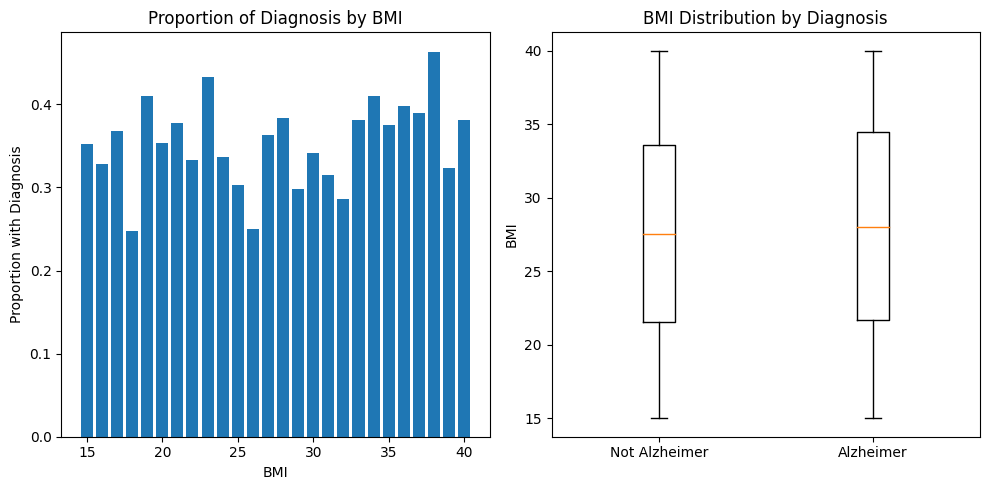

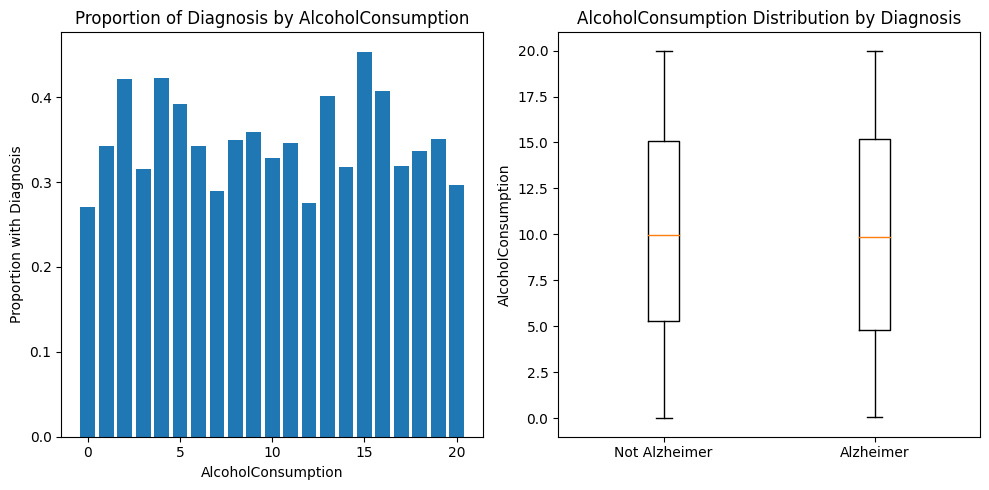

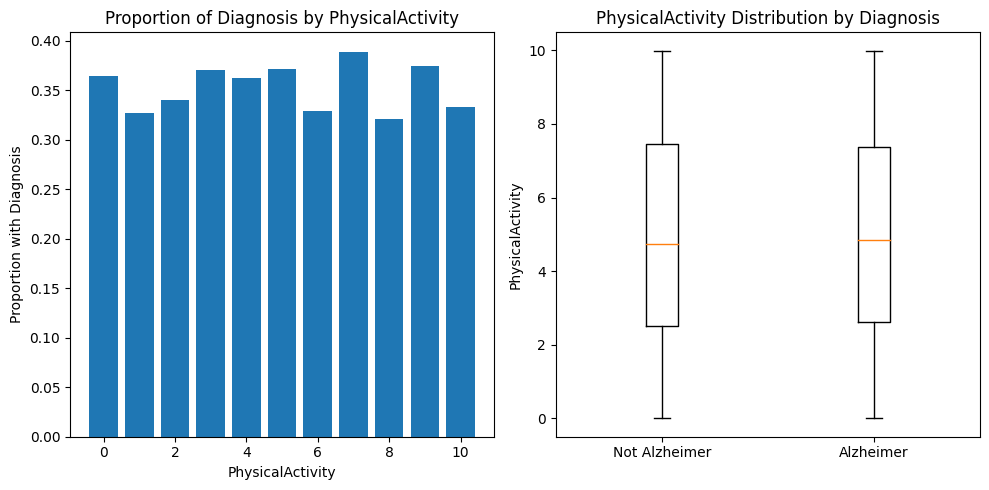

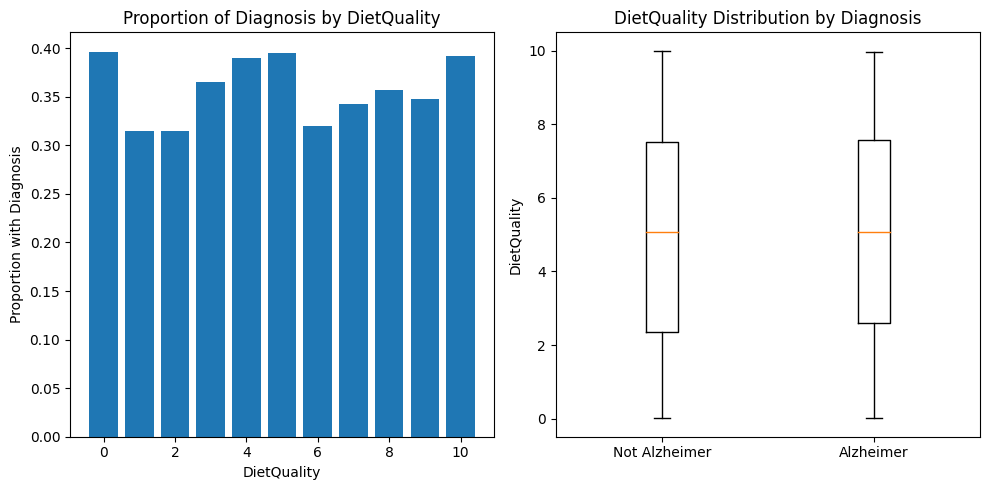

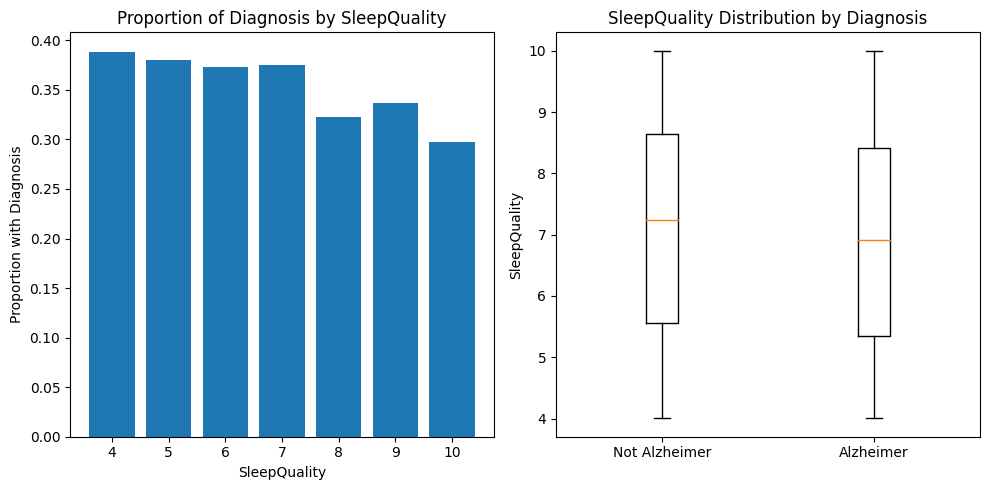

In [16]:
df[numerical_columns] = df[numerical_columns].round()

for col in ['BMI','AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality']:
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    proportion = df.groupby(col)['Diagnosis'].mean()
    plt.bar(proportion.index, proportion.values)
    plt.xlabel(col)
    plt.ylabel('Proportion with Diagnosis')
    plt.title(f'Proportion of Diagnosis by {col}')

    plt.subplot(1,2,2)
    plt.boxplot([data[data['Diagnosis'] == 0][col], data[data['Diagnosis'] == 1][col]],labels=['Not Alzheimer', 'Alzheimer'])
    plt.ylabel(col)
    plt.title(f'{col} Distribution by Diagnosis')

    plt.tight_layout()
    plt.show()

### Analysis of Medical History

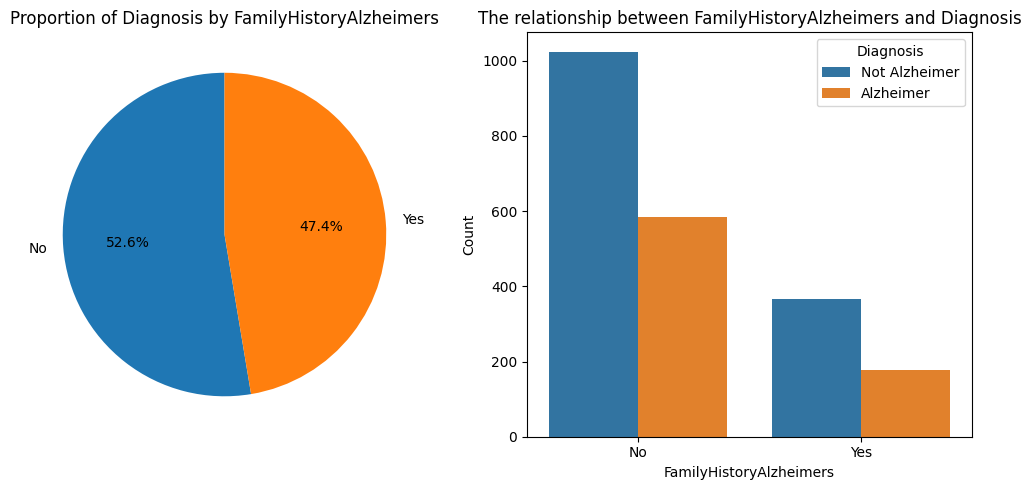

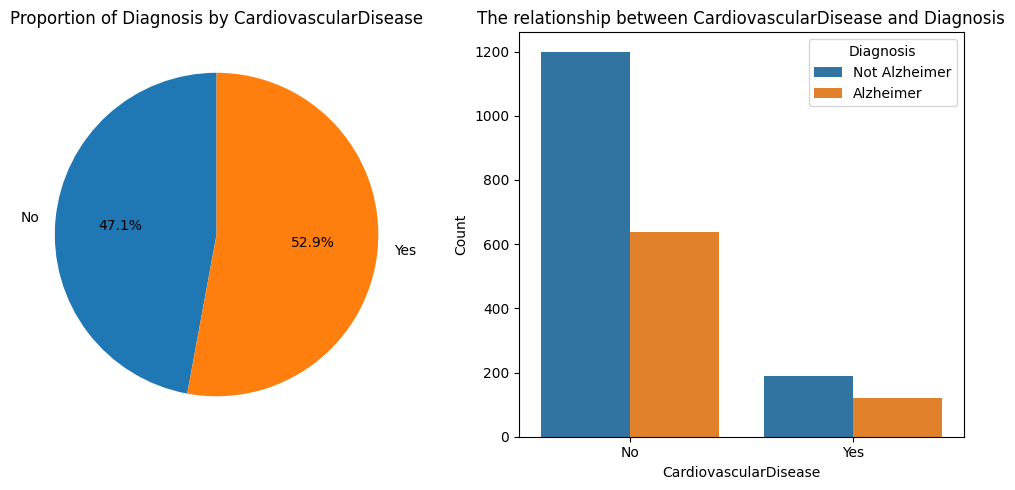

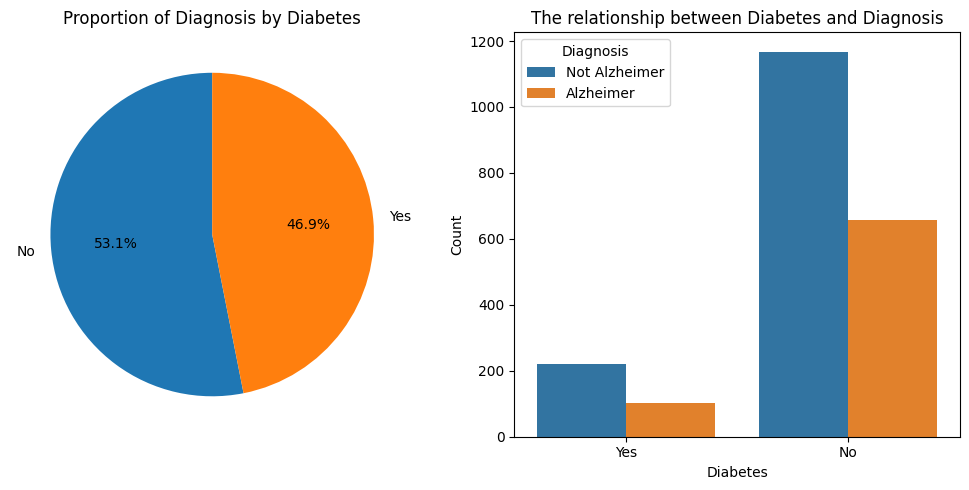

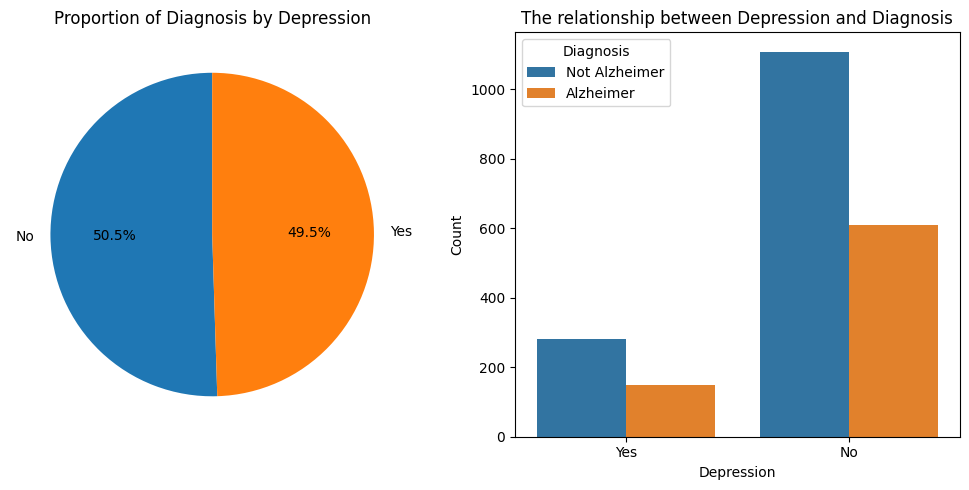

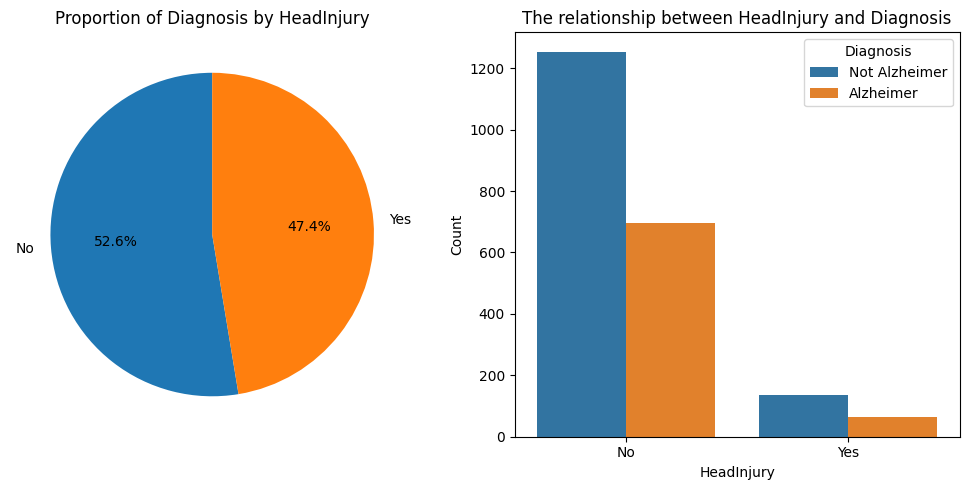

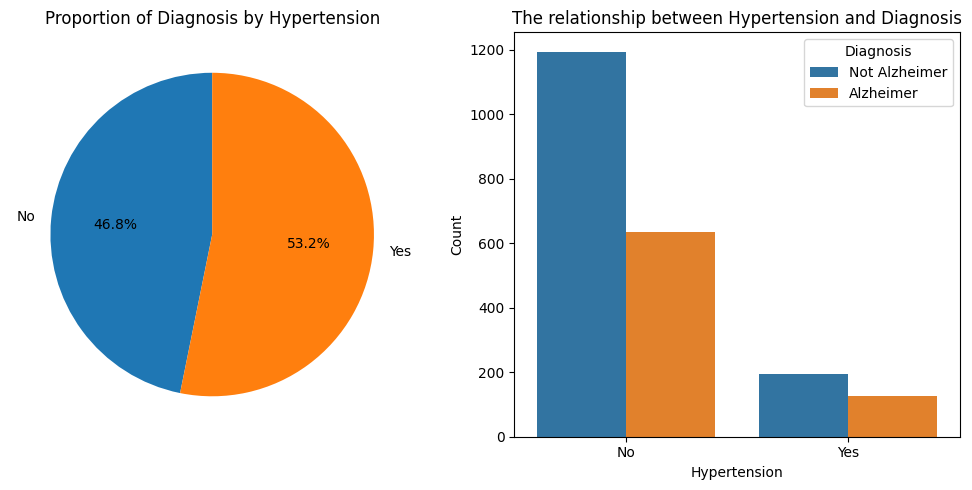

In [17]:
for col in medical_history:
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    diagnosis_proportion = data.groupby(col)['Diagnosis'].mean()
    plt.pie(diagnosis_proportion, labels=['No', 'Yes'], autopct='%1.1f%%', startangle=90)
    plt.title(f'Proportion of Diagnosis by {col}')

    plt.subplot(1,2,2)
    sns.countplot(data=df, x=col, hue='Diagnosis')
    plt.title(f'The relationship between {col} and Diagnosis')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Diagnosis', labels=['Not Alzheimer', 'Alzheimer'])

    plt.tight_layout()
    plt.show()

### Analysis of Clinical Measurements

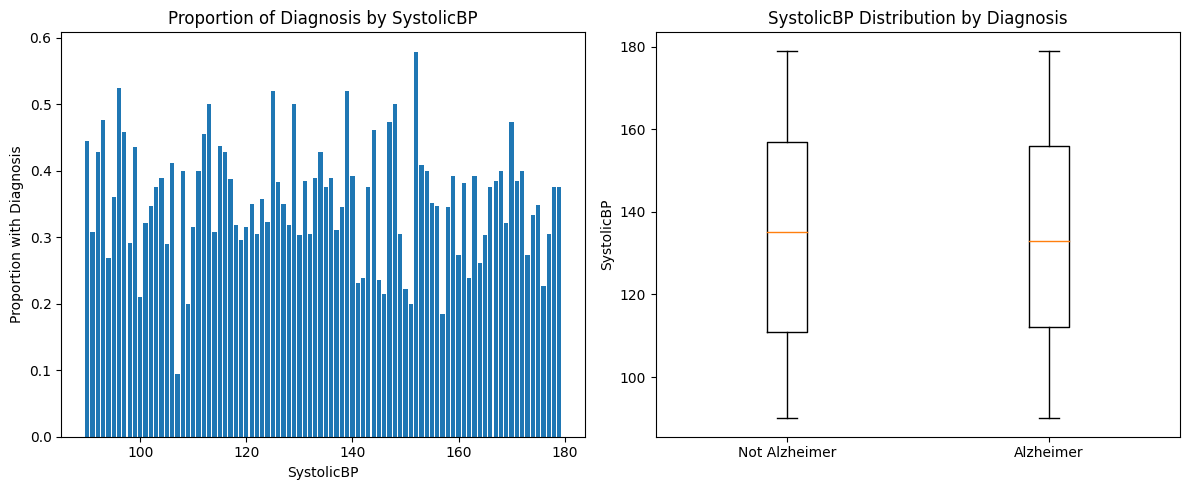

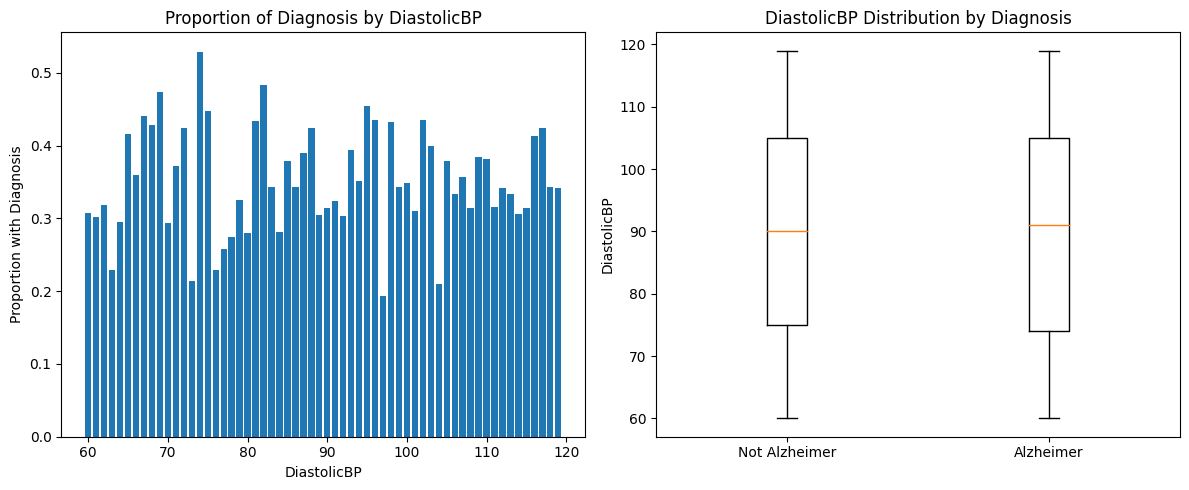

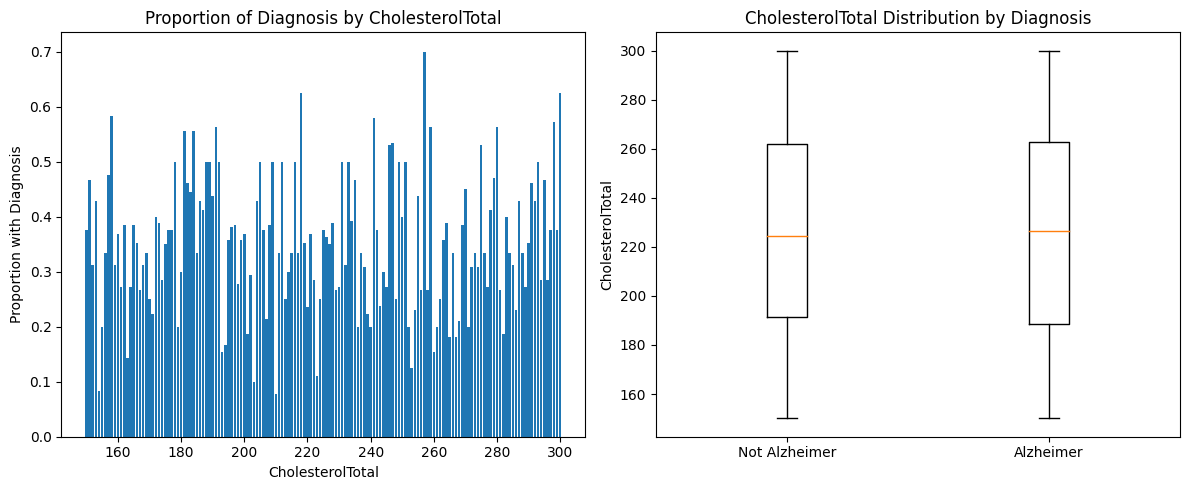

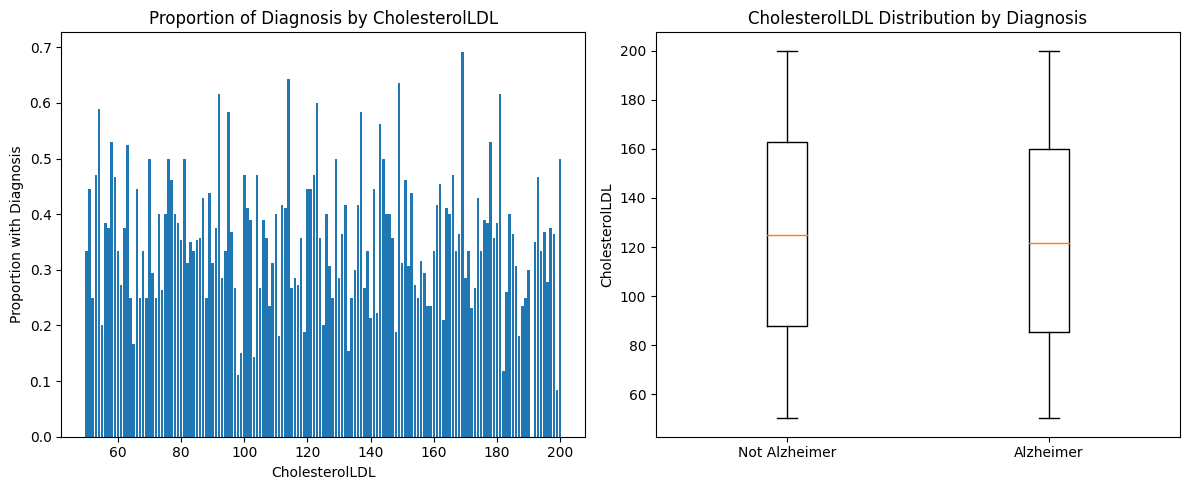

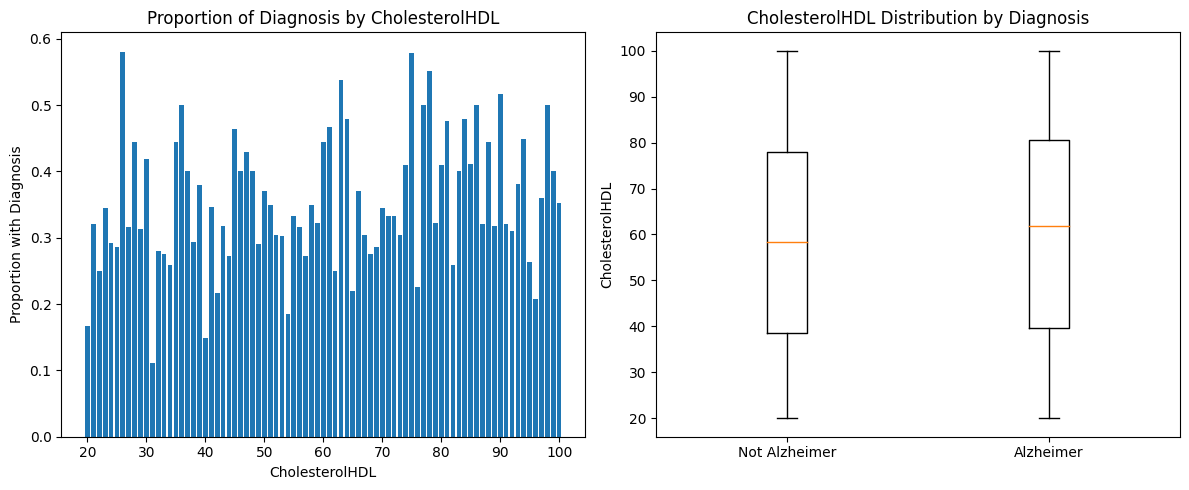

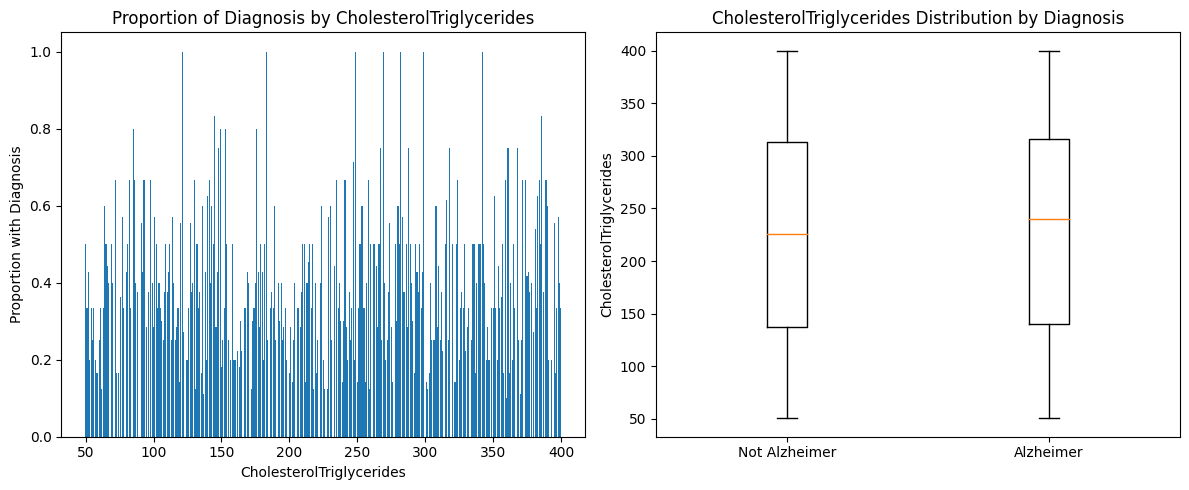

In [18]:
for col in clinical:
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    proportion = df.groupby(col)['Diagnosis'].mean()
    plt.bar(proportion.index, proportion.values)
    plt.xlabel(col)
    plt.ylabel('Proportion with Diagnosis')
    plt.title(f'Proportion of Diagnosis by {col}')

    plt.subplot(1,2,2)
    plt.boxplot([data[data['Diagnosis'] == 0][col], data[data['Diagnosis'] == 1][col]],labels=['Not Alzheimer', 'Alzheimer'])
    plt.ylabel(col)
    plt.title(f'{col} Distribution by Diagnosis')

    plt.tight_layout()
    plt.show()

### Analysis of Cognitive and Functional Assessments

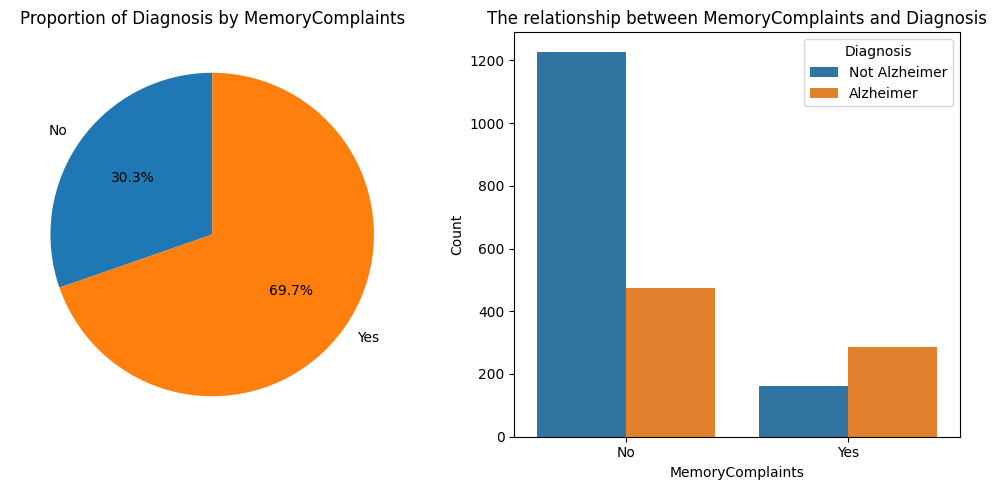

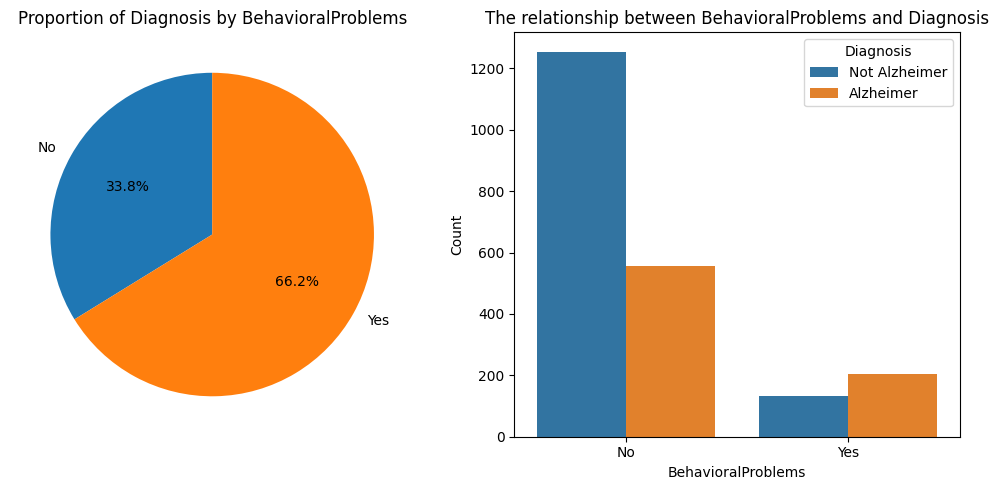

In [19]:
# Analysis of the impact of memory complaints
for col in ['MemoryComplaints', 'BehavioralProblems']:
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    diagnosis_proportion = data.groupby(col)['Diagnosis'].mean()
    plt.pie(diagnosis_proportion, labels=['No', 'Yes'], autopct='%1.1f%%', startangle=90)
    plt.title(f'Proportion of Diagnosis by {col}')

    plt.subplot(1,2,2)
    sns.countplot(data=df, x=col, hue='Diagnosis')
    plt.title(f'The relationship between {col} and Diagnosis')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Diagnosis', labels=['Not Alzheimer', 'Alzheimer'])

    plt.tight_layout()
    plt.show()

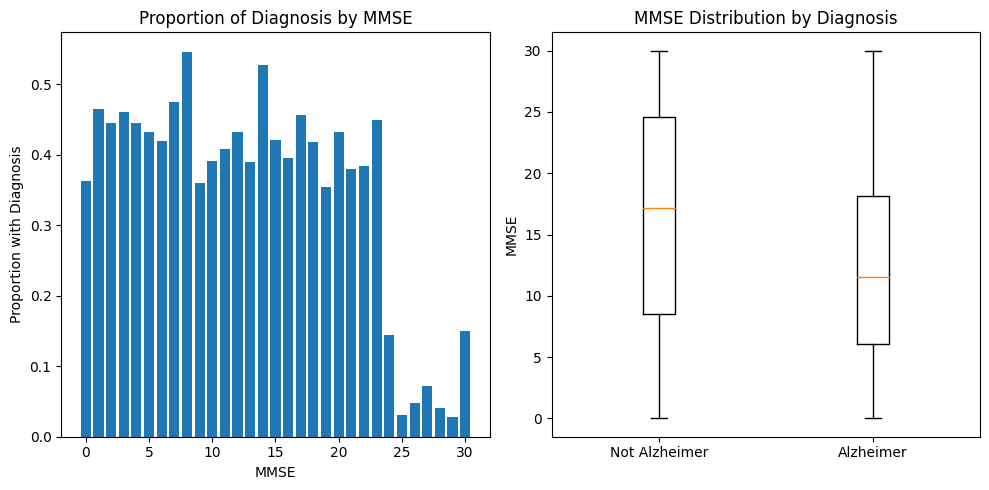

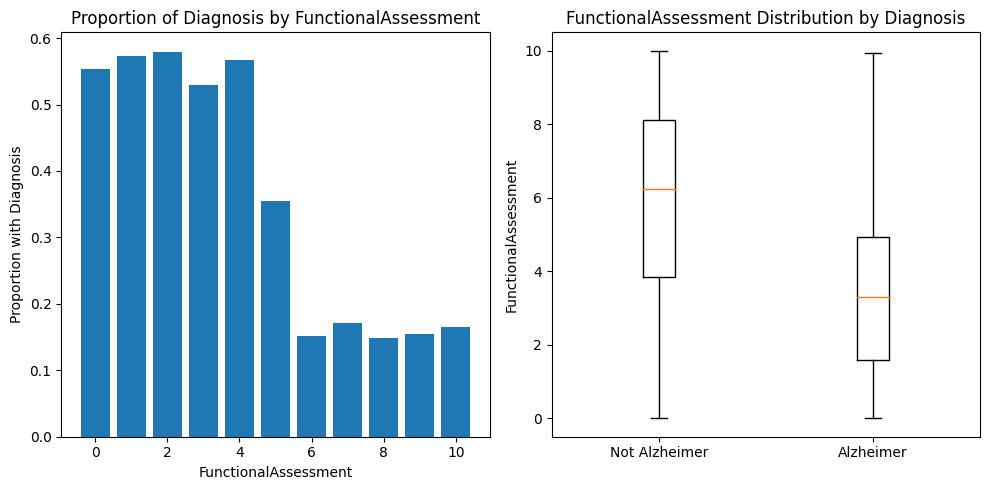

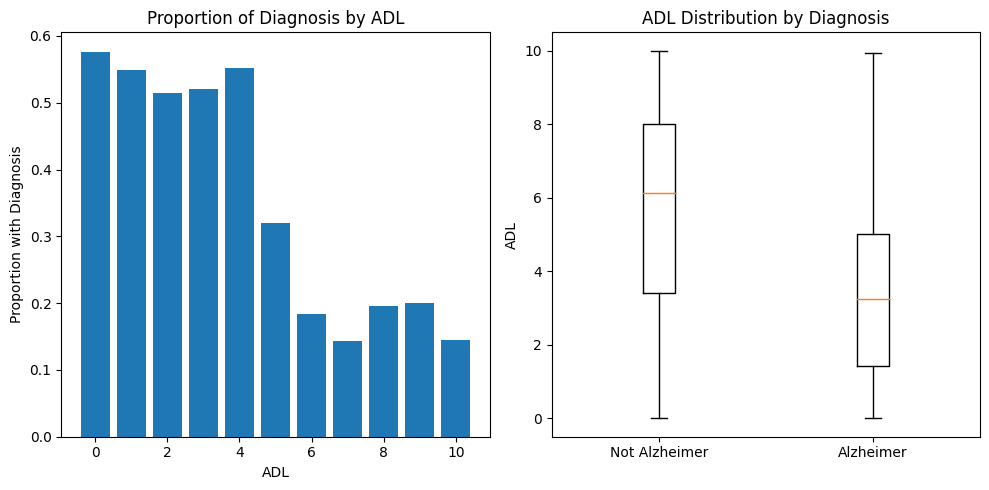

In [20]:
for col in ['MMSE', 'FunctionalAssessment', 'ADL']:
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    proportion = df.groupby(col)['Diagnosis'].mean()
    plt.bar(proportion.index, proportion.values)
    plt.xlabel(col)
    plt.ylabel('Proportion with Diagnosis')
    plt.title(f'Proportion of Diagnosis by {col}')

    plt.subplot(1,2,2)
    plt.boxplot([data[data['Diagnosis'] == 0][col], data[data['Diagnosis'] == 1][col]],labels=['Not Alzheimer', 'Alzheimer'])
    plt.ylabel(col)
    plt.title(f'{col} Distribution by Diagnosis')

    plt.tight_layout()
    plt.show()

### Analysis of Symptoms

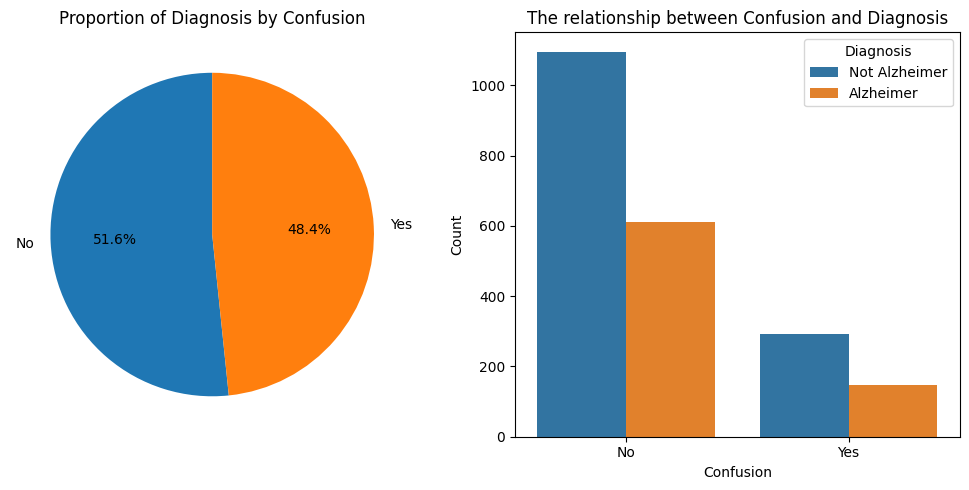

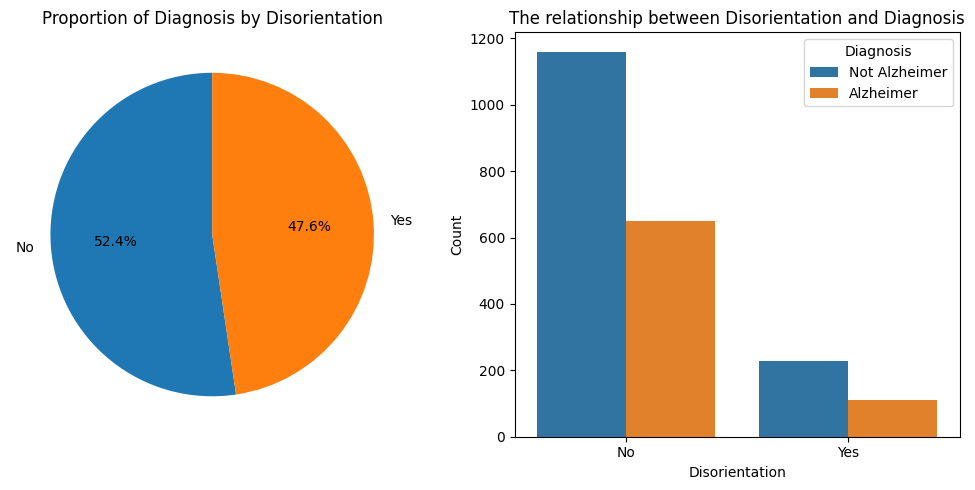

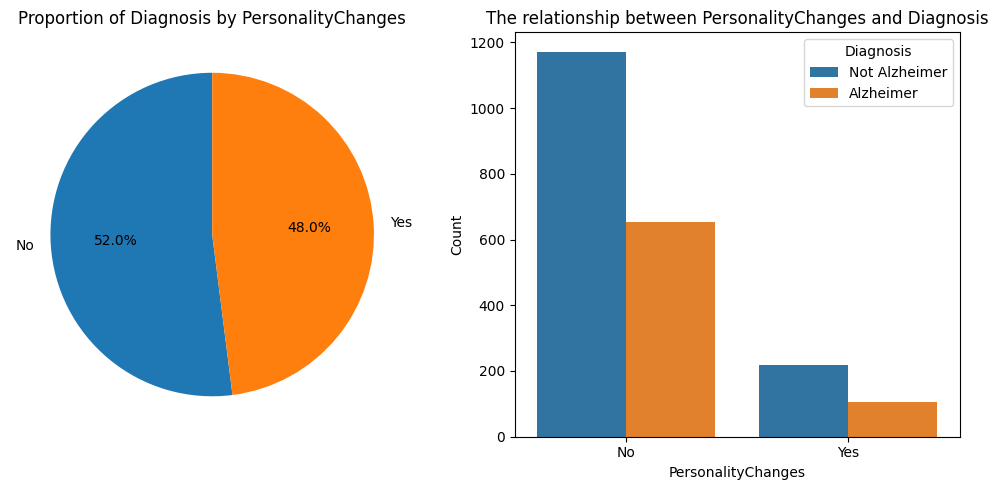

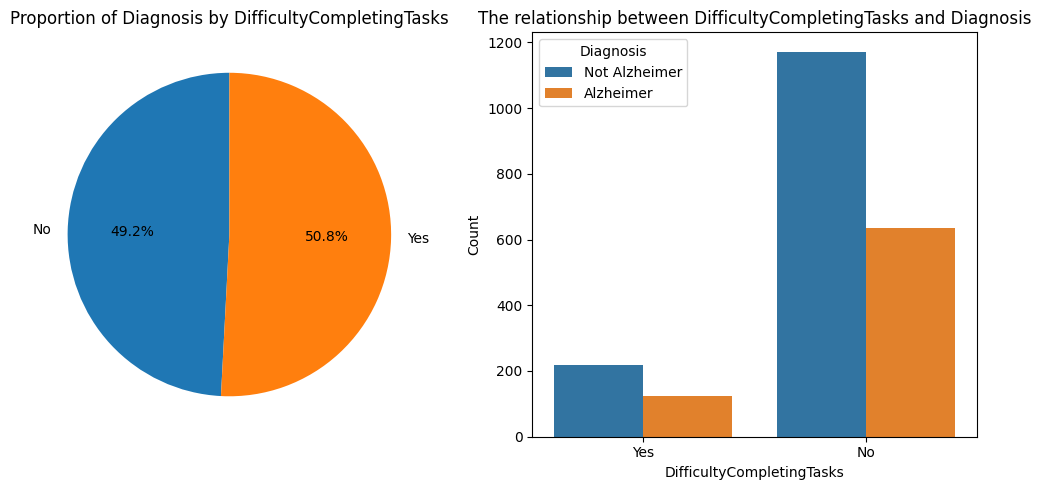

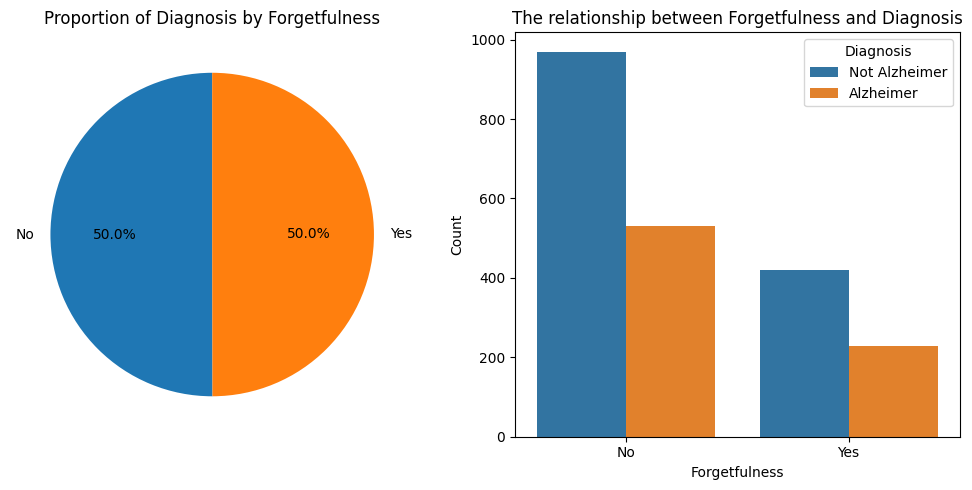

In [21]:
for col in symptoms:
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    diagnosis_proportion = data.groupby(col)['Diagnosis'].mean()
    plt.pie(diagnosis_proportion, labels=['No', 'Yes'], autopct='%1.1f%%', startangle=90)
    plt.title(f'Proportion of Diagnosis by {col}')

    plt.subplot(1,2,2)
    sns.countplot(data=df, x=col, hue='Diagnosis')
    plt.title(f'The relationship between {col} and Diagnosis')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Diagnosis', labels=['Not Alzheimer', 'Alzheimer'])

    plt.tight_layout()
    plt.show()

### Target Variable

Text(0.5, 1.0, 'Proportion of Diagnosis')

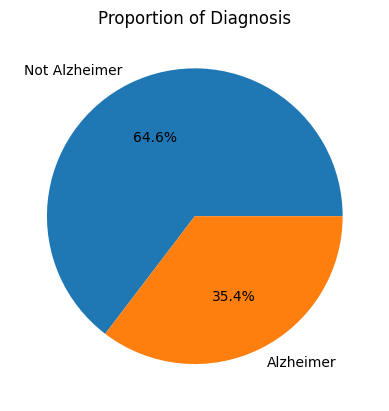

In [22]:
plt.pie(data['Diagnosis'].value_counts(), labels=['Not Alzheimer', 'Alzheimer'], autopct='%1.1f%%', startangle=0)
plt.title('Proportion of Diagnosis')

## Correlation matrix

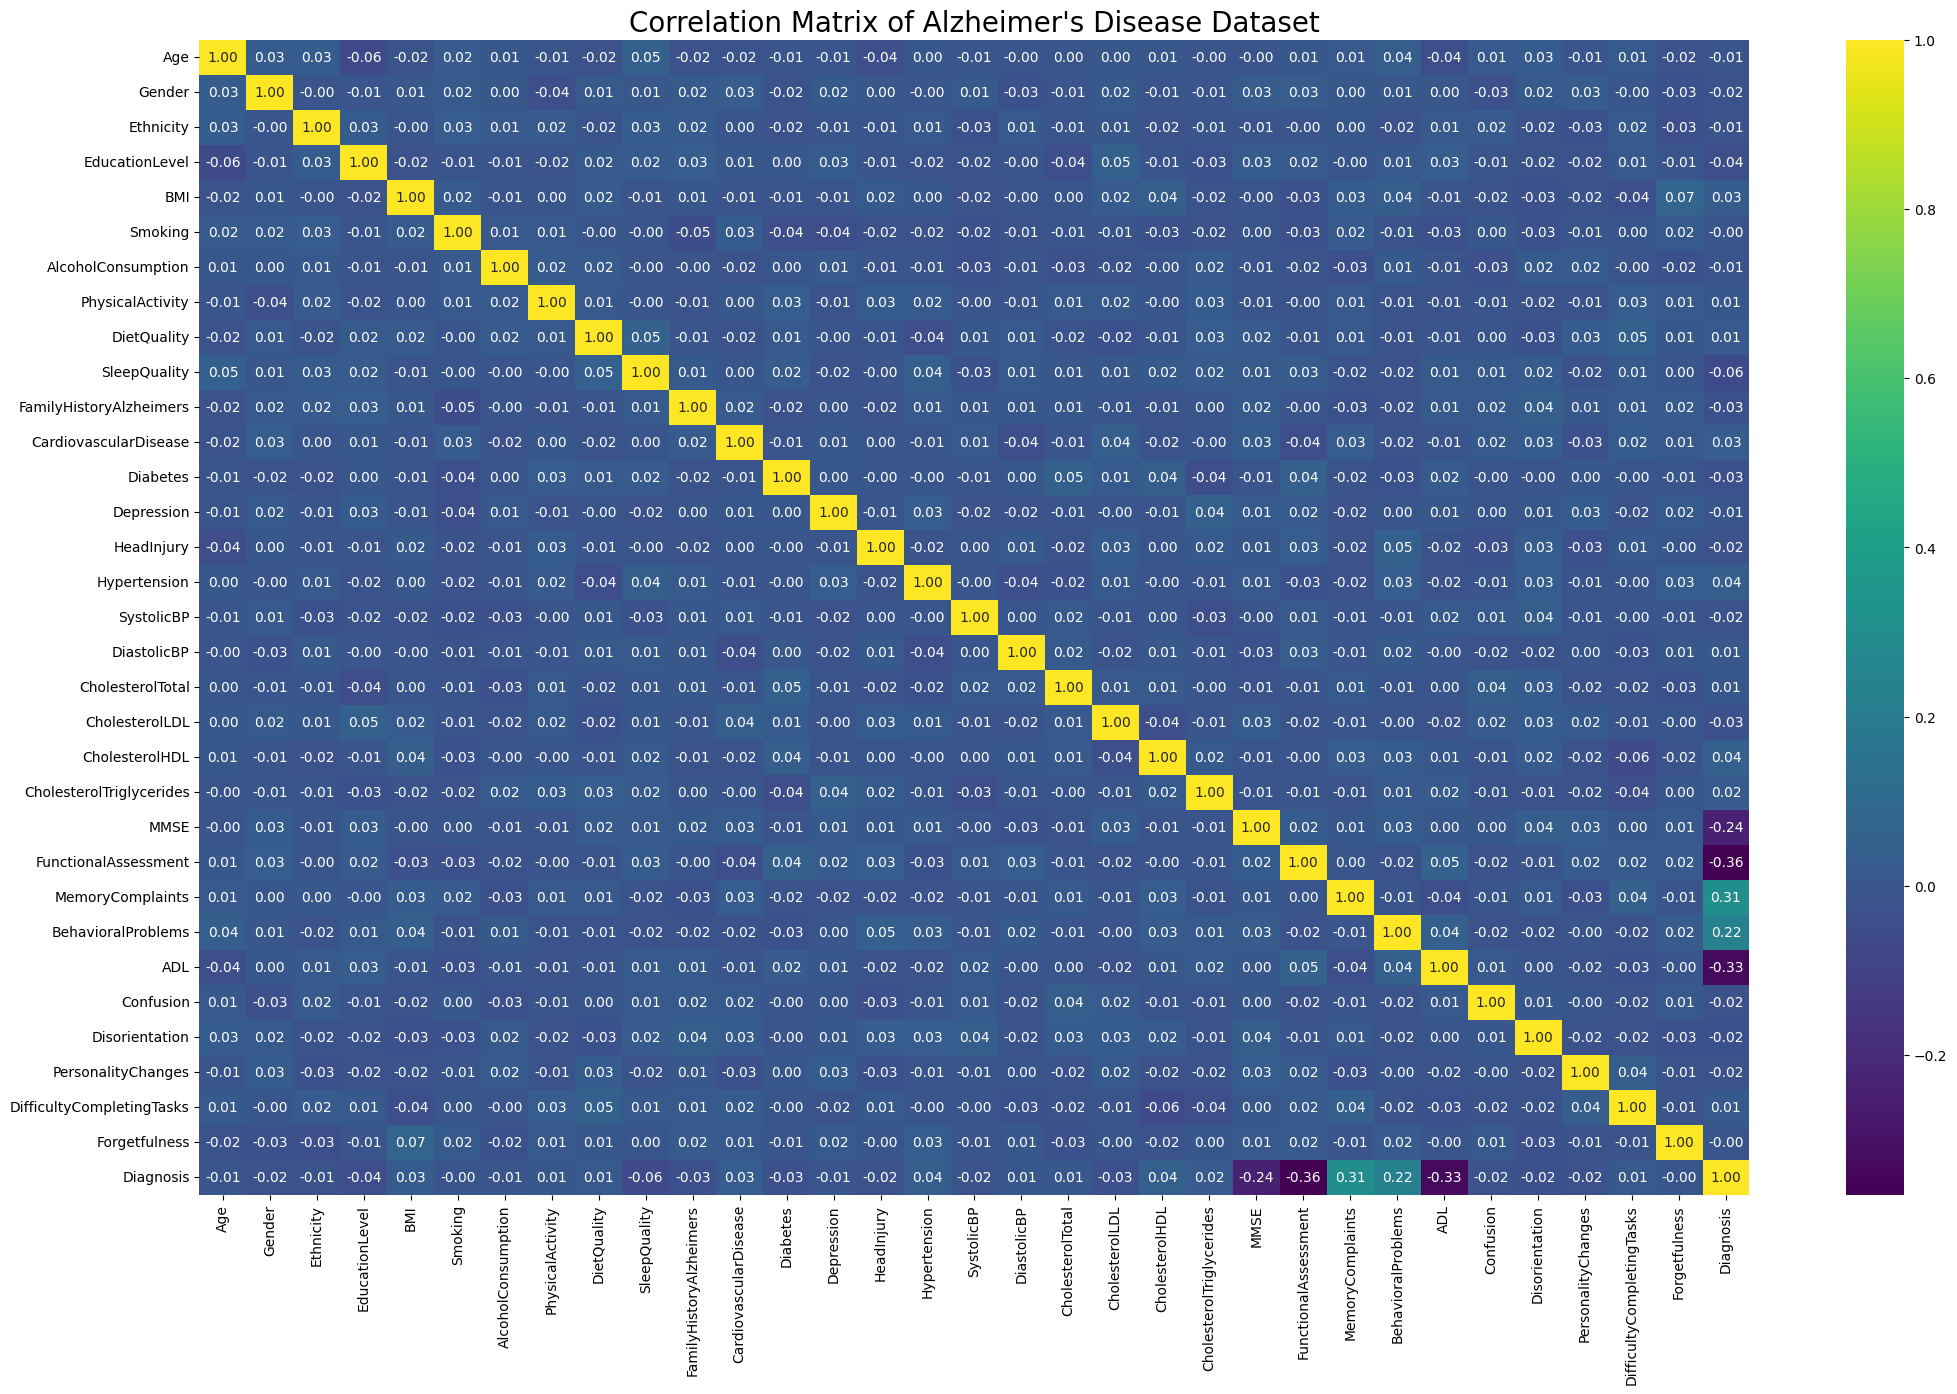

In [23]:
correlation_matrix = data.corr()
plt.figure(figsize=(25, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f')
plt.title("Correlation Matrix of Alzheimer's Disease Dataset", fontsize=20)
plt.show()

# Training

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score, classification_report, roc_curve, auc

X = data.drop(['Diagnosis'], axis = 1)
y = data['Diagnosis']

X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
X_valid, X_test, y_valid, y_test = train_test_split(X_validation, y_validation, test_size=0.5, random_state=42, shuffle=True)


print(X_train.shape)
print(X_validation.shape)
print(X_valid.shape)
print(X_test.shape)

models = dict()

(1719, 32)
(430, 32)
(215, 32)
(215, 32)


In [6]:
def train_and_evaluate(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")

    print(classification_report(y_test, y_pred))

    # Show confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['No', 'Yes'])
    cm_display.plot()
    plt.title("Confusion matrix")
    plt.show()

    # ROC-AUC
    y_pred_proba = model.predict_proba(X_test)[:, 1]  
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curves")
    plt.legend()
    plt.show()

    return accuracy, fpr, tpr, roc_auc

### Logistic Regression

Accuracy: 0.77
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       140
           1       0.71      0.56      0.63        75

    accuracy                           0.77       215
   macro avg       0.75      0.72      0.73       215
weighted avg       0.76      0.77      0.76       215



c:\Users\HanDong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


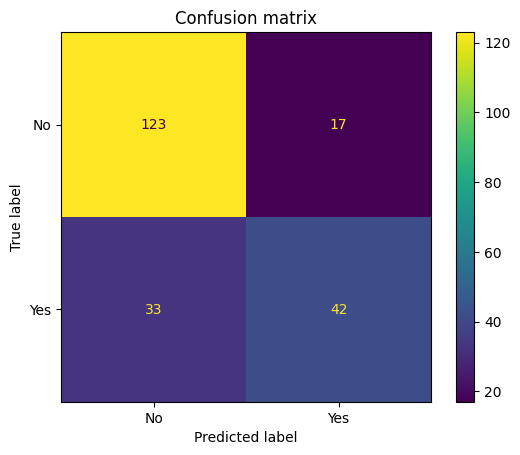

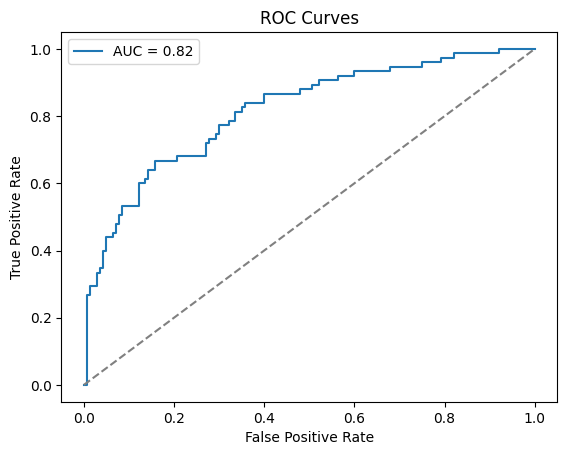

In [7]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(random_state=32)

accuracy, fpr, tpr, roc_auc = train_and_evaluate(logistic_model, X_train, X_test, y_train, y_test)
models['Logistic Regression'] = [accuracy, fpr, tpr, roc_auc]

### Support Vector Machine

Accuracy: 0.83
              precision    recall  f1-score   support

           0       0.86      0.89      0.87       140
           1       0.78      0.72      0.75        75

    accuracy                           0.83       215
   macro avg       0.82      0.81      0.81       215
weighted avg       0.83      0.83      0.83       215



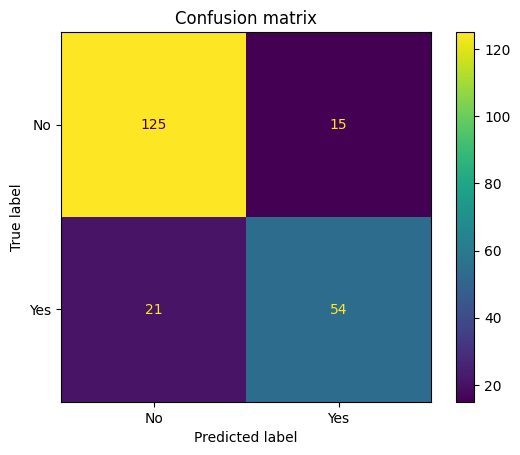

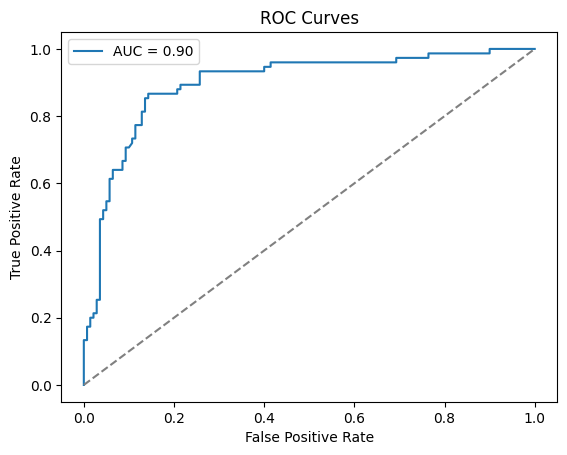

In [8]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear', probability=True)

accuracy, fpr, tpr, roc_auc = train_and_evaluate(svm_model, X_train, X_test, y_train, y_test)
models['SVM'] = [accuracy, fpr, tpr, roc_auc]

### Decision Tree

Accuracy: 0.89
              precision    recall  f1-score   support

           0       0.91      0.92      0.92       140
           1       0.85      0.84      0.85        75

    accuracy                           0.89       215
   macro avg       0.88      0.88      0.88       215
weighted avg       0.89      0.89      0.89       215



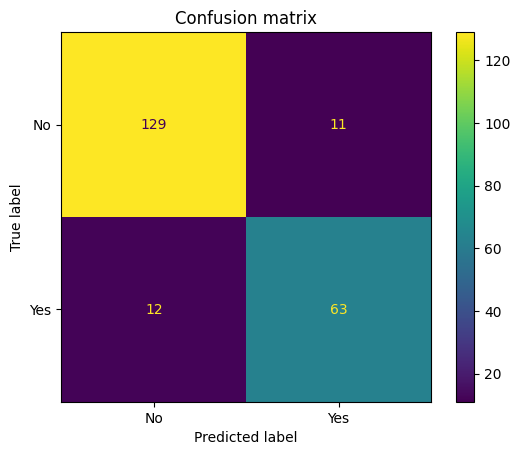

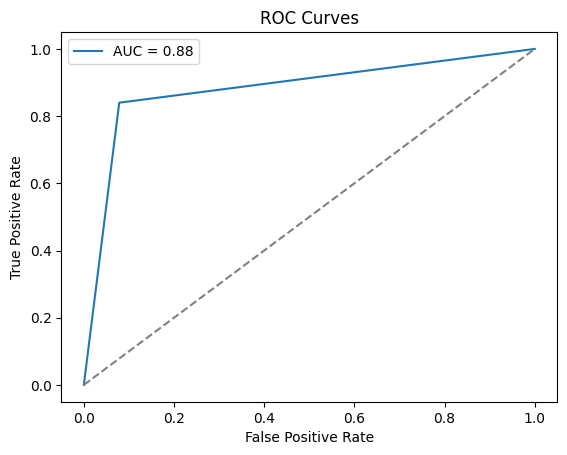

In [9]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_model = DecisionTreeClassifier(random_state=5)

accuracy, fpr, tpr, roc_auc = train_and_evaluate(decision_tree_model, X_train, X_test, y_train, y_test)
models['Decision Tree'] = [accuracy, fpr, tpr, roc_auc]

### Random Forest

Accuracy: 0.93
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       140
           1       0.95      0.84      0.89        75

    accuracy                           0.93       215
   macro avg       0.94      0.91      0.92       215
weighted avg       0.93      0.93      0.93       215



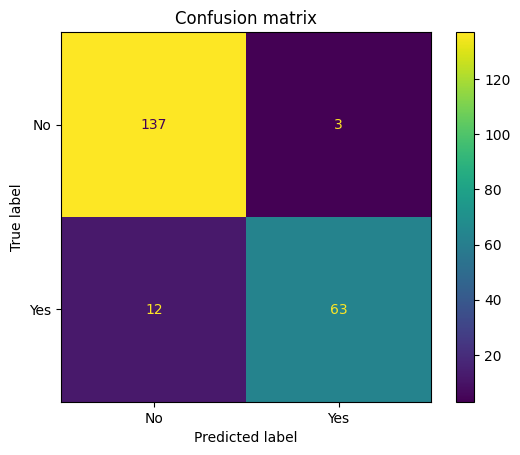

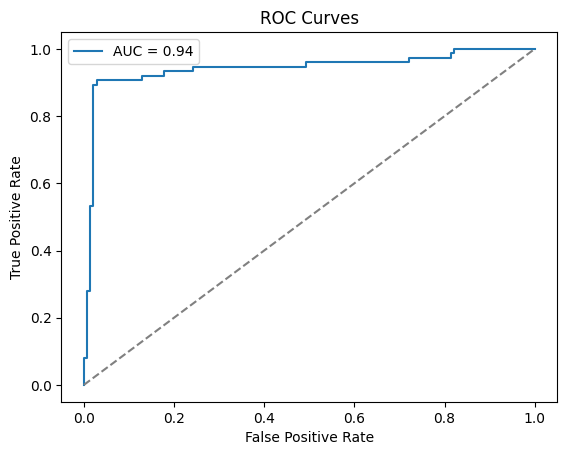

In [10]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(n_estimators=200, max_depth=30, min_samples_split=5, random_state=42)

accuracy, fpr, tpr, roc_auc = train_and_evaluate(random_forest_model, X_train, X_test, y_train, y_test)
models['Random Forest'] = [accuracy, fpr, tpr, roc_auc]

### K Nearest Neighbors

Accuracy: 0.53
              precision    recall  f1-score   support

           0       0.62      0.71      0.67       140
           1       0.27      0.20      0.23        75

    accuracy                           0.53       215
   macro avg       0.45      0.46      0.45       215
weighted avg       0.50      0.53      0.51       215



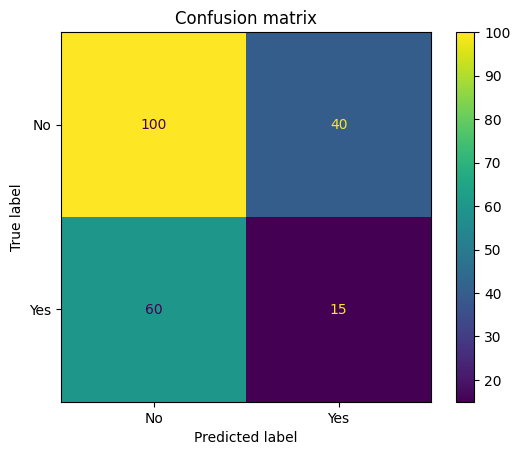

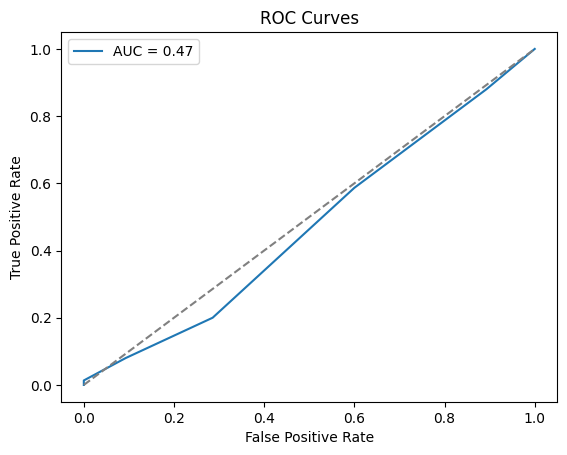

In [11]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)

accuracy, fpr, tpr, roc_auc = train_and_evaluate(knn_model, X_train, X_test, y_train, y_test)
models['KNN'] = [accuracy, fpr, tpr, roc_auc]

### K Means

Accuracy: 0.49
              precision    recall  f1-score   support

           0       0.63      0.52      0.57       140
           1       0.33      0.44      0.38        75

    accuracy                           0.49       215
   macro avg       0.48      0.48      0.47       215
weighted avg       0.53      0.49      0.50       215



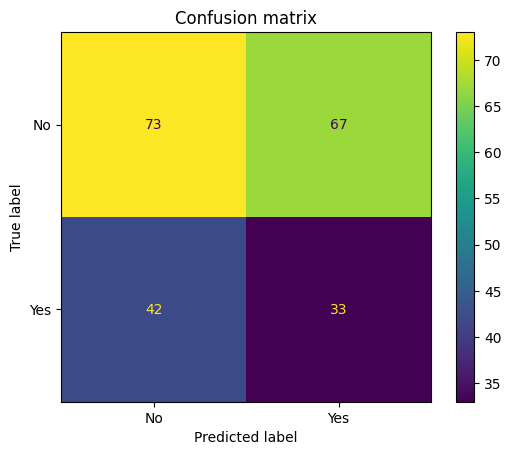

In [12]:
from sklearn.cluster import KMeans

kmeans_model = KMeans(n_clusters=2, random_state=0)

kmeans_model.fit(X_train, y_train)
y_pred = kmeans_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
models['K Means'] = [accuracy]

print(classification_report(y_test, y_pred))

# Show confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['No', 'Yes'])
cm_display.plot()
plt.title("Confusion matrix")
plt.show()

## Compare models

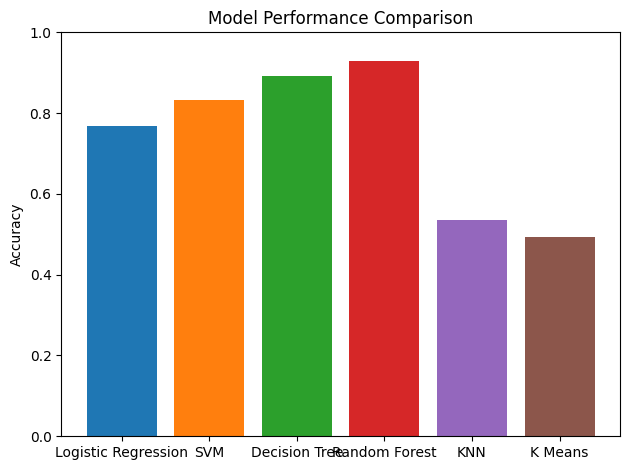

In [13]:
for model, score in models.items():
    plt.bar(model, score[0])
plt.title("Model Performance Comparison")
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

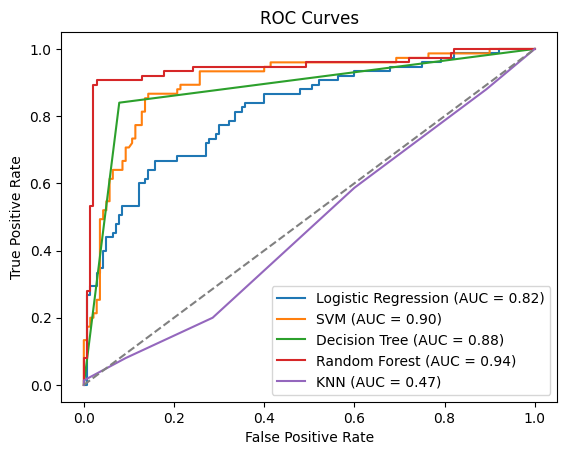

In [14]:
models.pop('K Means')

for model, score in models.items():
    plt.plot(score[1], score[2], label=f"{model} (AUC = {score[3]:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.show()

## Save model

In [34]:
import joblib

# save the model with the highest accuracy
joblib.dump(random_forest_model, 'saved_models/random_forest_classifier.pkl')

['saved_models/random_forest_classifier.pkl']

# SHAP

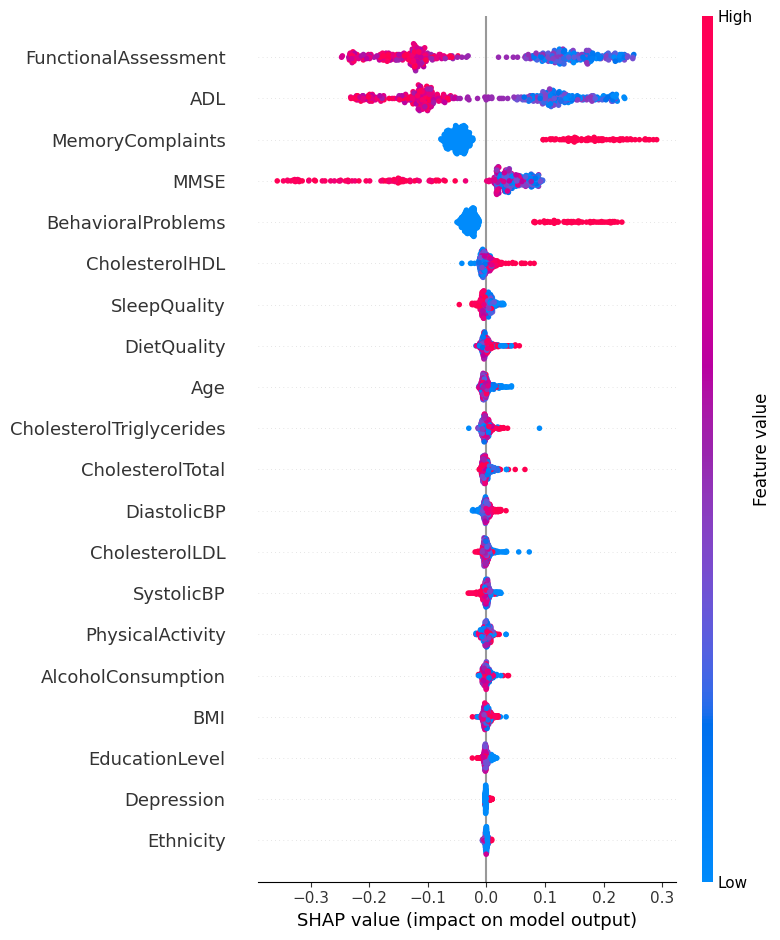

In [49]:
import shap

# Explain model predictions using SHAP for Random Forest
explainer = shap.TreeExplainer(random_forest_model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values[:, :, 1], X_test)

c:\Users\HanDong\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


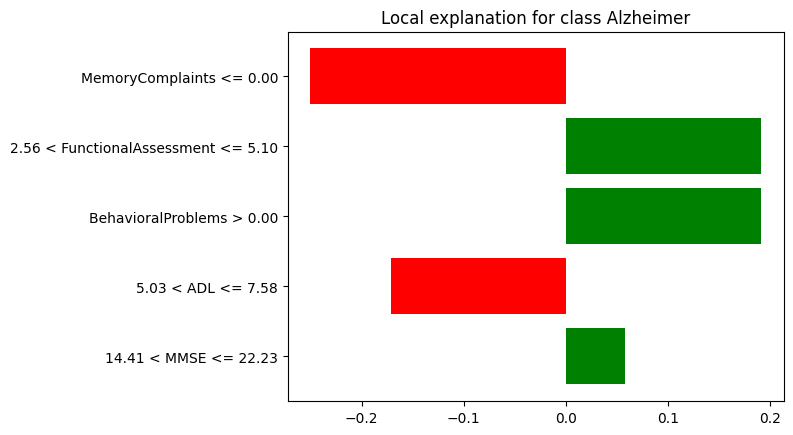

In [25]:
from lime.lime_tabular import LimeTabularExplainer

# Get the class names
class_names = ['Not Alzheimer', 'Alzheimer']

# Get the feature names
feature_names = list(X_train.columns)

# Fit the Explainer on the training data set using the LimeTabularExplainer
explainer = LimeTabularExplainer(X_train.values, feature_names =     
                                 feature_names,
                                 class_names = class_names, 
                                 mode = 'classification')

# Select an instance to explain
instance_index = 100  # Change this index to select a different instance
instance = X_test.iloc[instance_index].values.reshape(1, -1)

# Predict function should return probability estimates
predict_fn = random_forest_model.predict_proba  # Assuming your model has this method

# Generate explanation for the selected instance
explanation = explainer.explain_instance(instance.flatten(), predict_fn, num_features=5)

explanation.as_pyplot_figure()
plt.show()
